In [1]:
import pandas as pd

golf_df = pd.read_csv('golf_dataset_long_format_with_text.csv')
golf_df.head(3)

,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...
1,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",B,0,0.0,NaN
2,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",C,0,0.0,NaN


In [2]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7665 entries, 0 to 7664
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             7665 non-null   object 
 1   Weekday          7665 non-null   int64  
 2   Holiday          7665 non-null   int64  
 3   Month            7665 non-null   object 
 4   Season           7665 non-null   object 
 5   Temperature      7665 non-null   float64
 6   Humidity         7665 non-null   float64
 7   Windy            7665 non-null   int64  
 8   Outlook          7665 non-null   object 
 9   Crowdedness      7665 non-null   float64
 10  EmailCampaign    7665 non-null   object 
 11  MaintenanceTask  7665 non-null   object 
 12  ID               7665 non-null   object 
 13  Play             7665 non-null   int64  
 14  PlayTimeHour     7665 non-null   float64
 15  Review           1352 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory usage: 958.3+ KB


In [3]:
num_to_weekday = {
    0: '일',
    1: '월',
    2: '화',
    3: '수',
    4: '목',
    5: '금',
    6: '토'
}

golf_df['Weekday_Num'] = golf_df['Weekday'].map(num_to_weekday)

month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

golf_df['Month_Num'] = golf_df['Month'].map(month_to_number)

In [4]:
golf_df.head(3)

,Date,Weekday,Holiday,Month,Season,Temperature,Humidity,Windy,Outlook,Crowdedness,EmailCampaign,MaintenanceTask,ID,Play,PlayTimeHour,Review,Weekday_Num,Month_Num
0,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",A,1,3.1,Absolutely exhilarating first day of the year!...,목,1
1,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",B,0,0.0,NaN,목,1
2,2021-01-01,4,1,Jan,Winter,3.3,49.0,1,sunny,0.73,Happy New Year and welcome to the Golf Course!...,"['Cleaning Amenities', 'Restroom Cleaning']",C,0,0.0,NaN,목,1


In [5]:
print(golf_df['ID'].unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['font.size'] = 10  
plt.rcParams['axes.unicode_minus'] = False  

golf_df['Year'] = pd.to_datetime(golf_df['Date']).dt.year
played = golf_df[golf_df['Play'] == 1]
unique_ids = golf_df['ID'].unique()

In [7]:
def line_plot(df, groupby_cols, value_col, plot_func, x_label, y_label, agg='mean'):
    
    if agg == 'sum':
        play_data = df.groupby(groupby_cols)[value_col].sum().reset_index()
    else:  
        play_data = df.groupby(groupby_cols)[value_col].mean().reset_index()
    
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
    axes = axes.flatten()
    
    for ax, id in zip(axes, unique_ids):
        id_data = play_data[play_data[groupby_cols[0]] == id]
        plot_func(data=id_data, x=groupby_cols[1], y=value_col, ax=ax)
        ax.set_title(f'ID : {id}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)

    plt.tight_layout()
    plt.show()

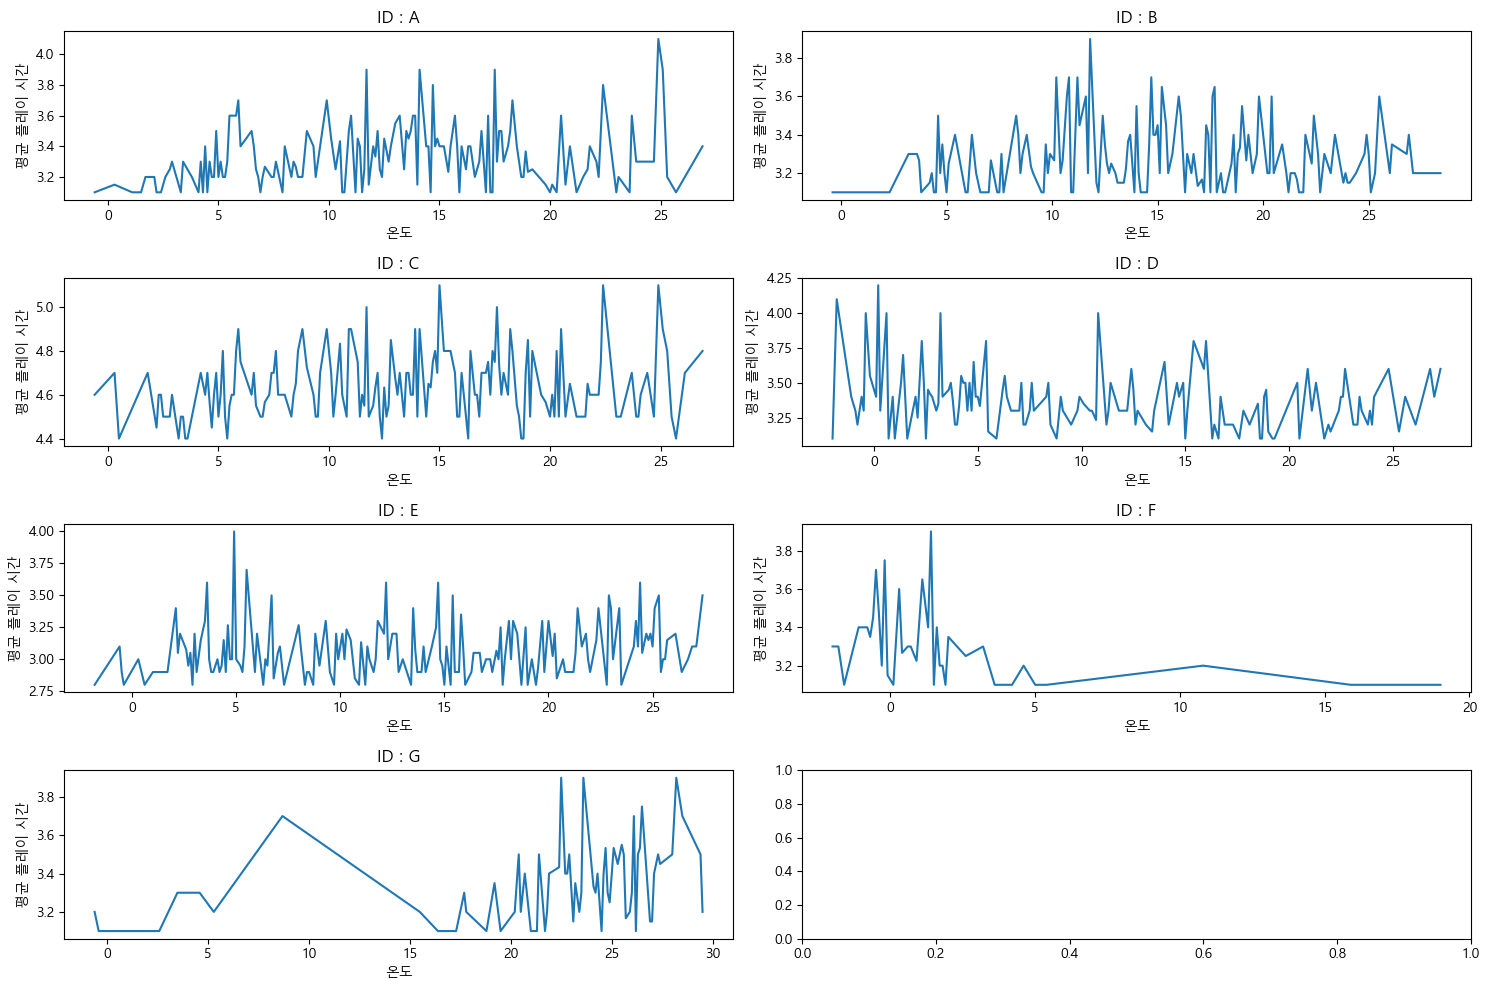

In [8]:
line_plot(played, ['ID', 'Temperature'], 'PlayTimeHour', sns.lineplot, '온도', '평균 플레이 시간', 'mean')

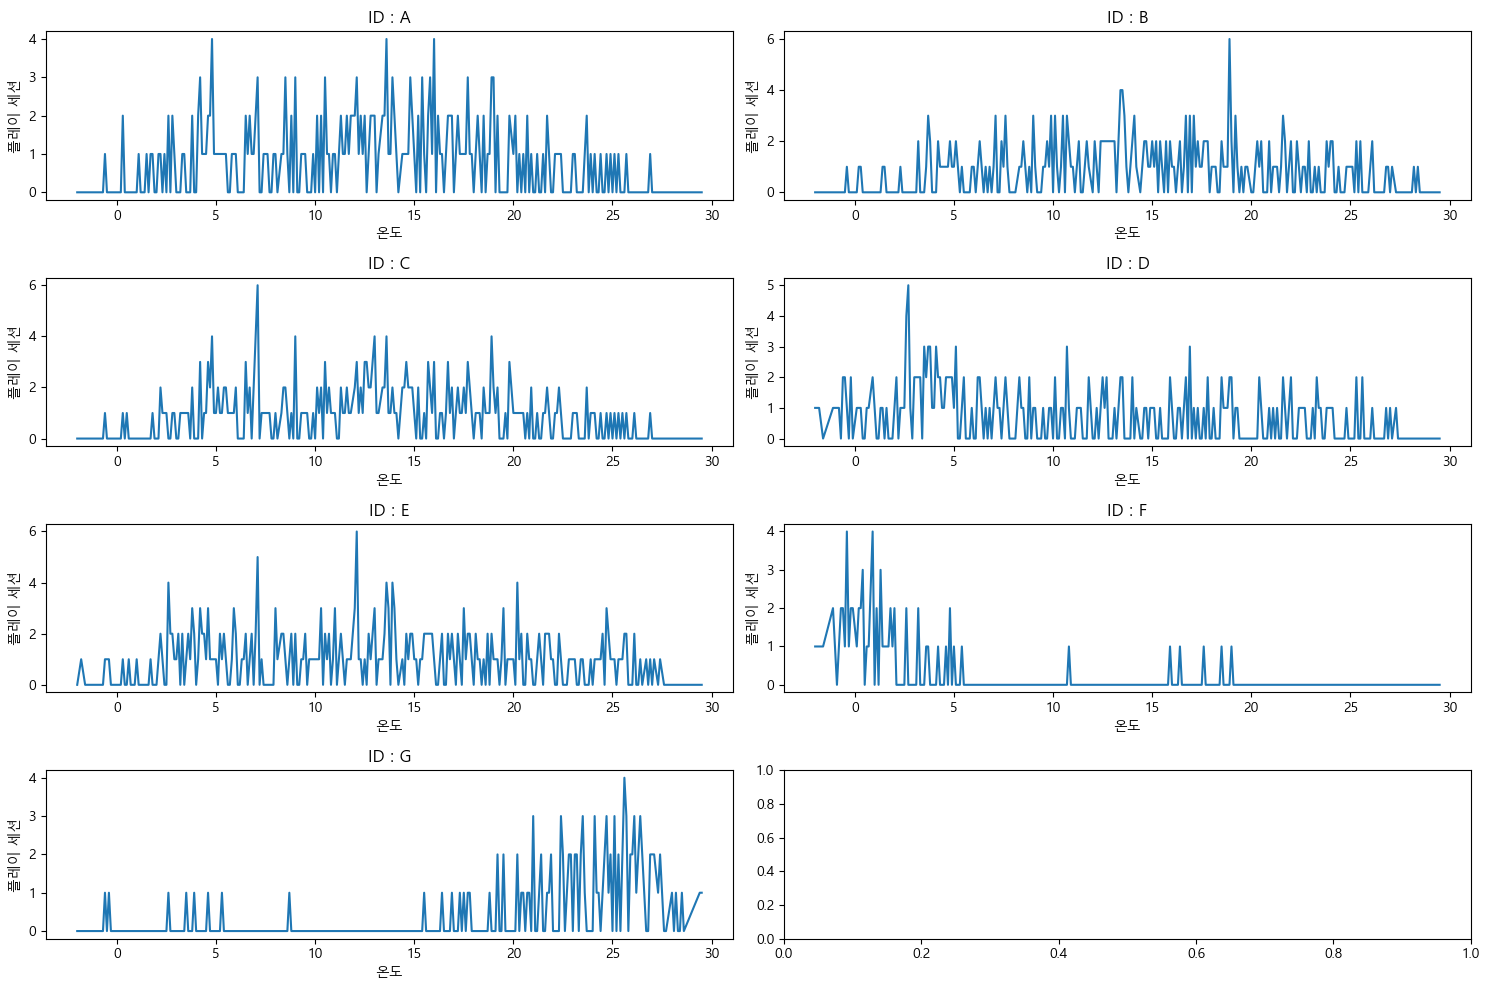

In [9]:
line_plot(golf_df, ['ID', 'Temperature'], 'Play', sns.lineplot, '온도', '플레이 세션', 'sum')

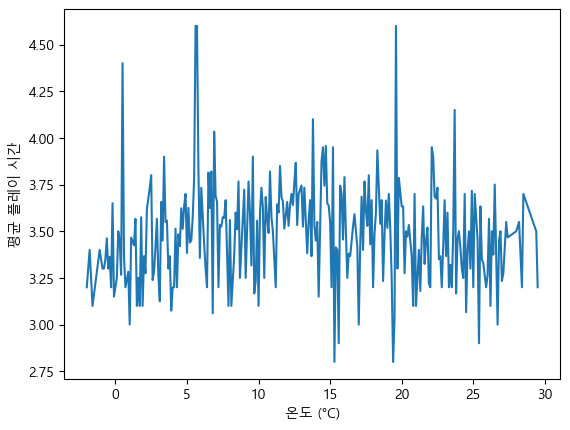

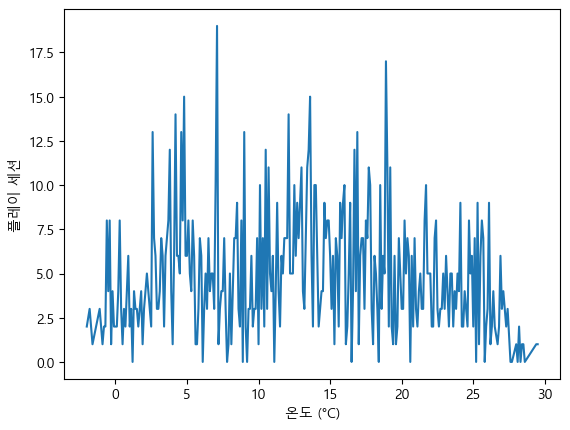

In [10]:
temp_playtime = played.groupby('Temperature')['PlayTimeHour'].mean().reset_index()
sns.lineplot(data=temp_playtime, x='Temperature', y='PlayTimeHour')
plt.xlabel('온도 (°C)')
plt.ylabel('평균 플레이 시간')
plt.show()

temp_sessions = golf_df.groupby('Temperature')['Play'].sum().reset_index()
sns.lineplot(data=temp_sessions, x='Temperature', y='Play')
plt.xlabel('온도 (°C)')
plt.ylabel('플레이 세션')
plt.show()

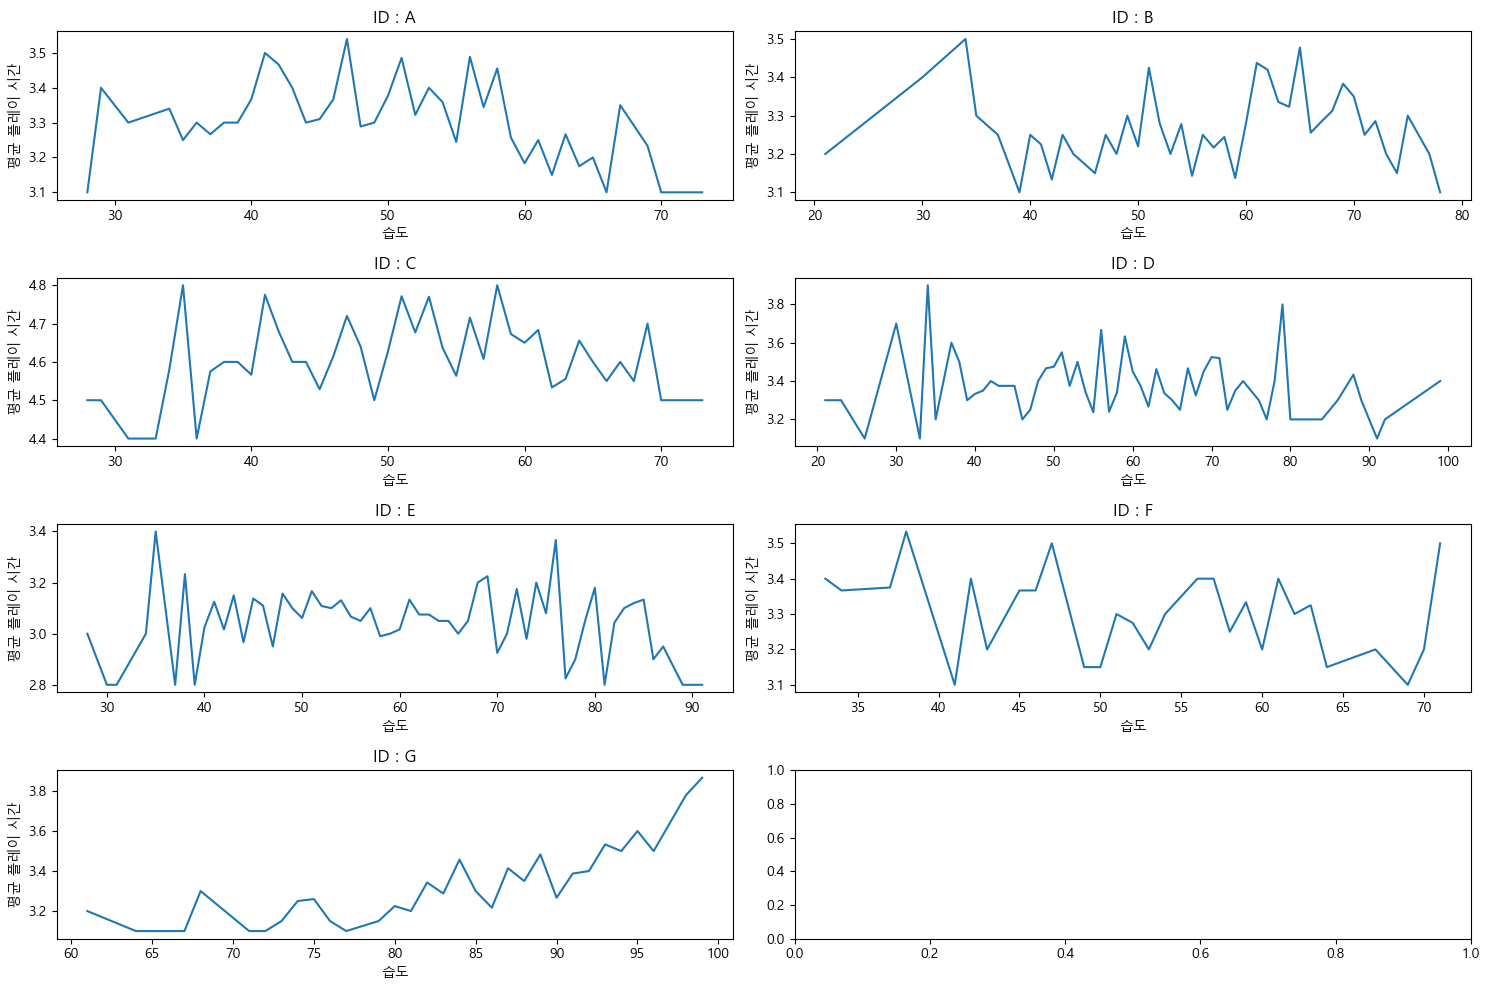

In [11]:
line_plot(played, ['ID', 'Humidity'], 'PlayTimeHour', sns.lineplot, '습도', '평균 플레이 시간', 'mean')

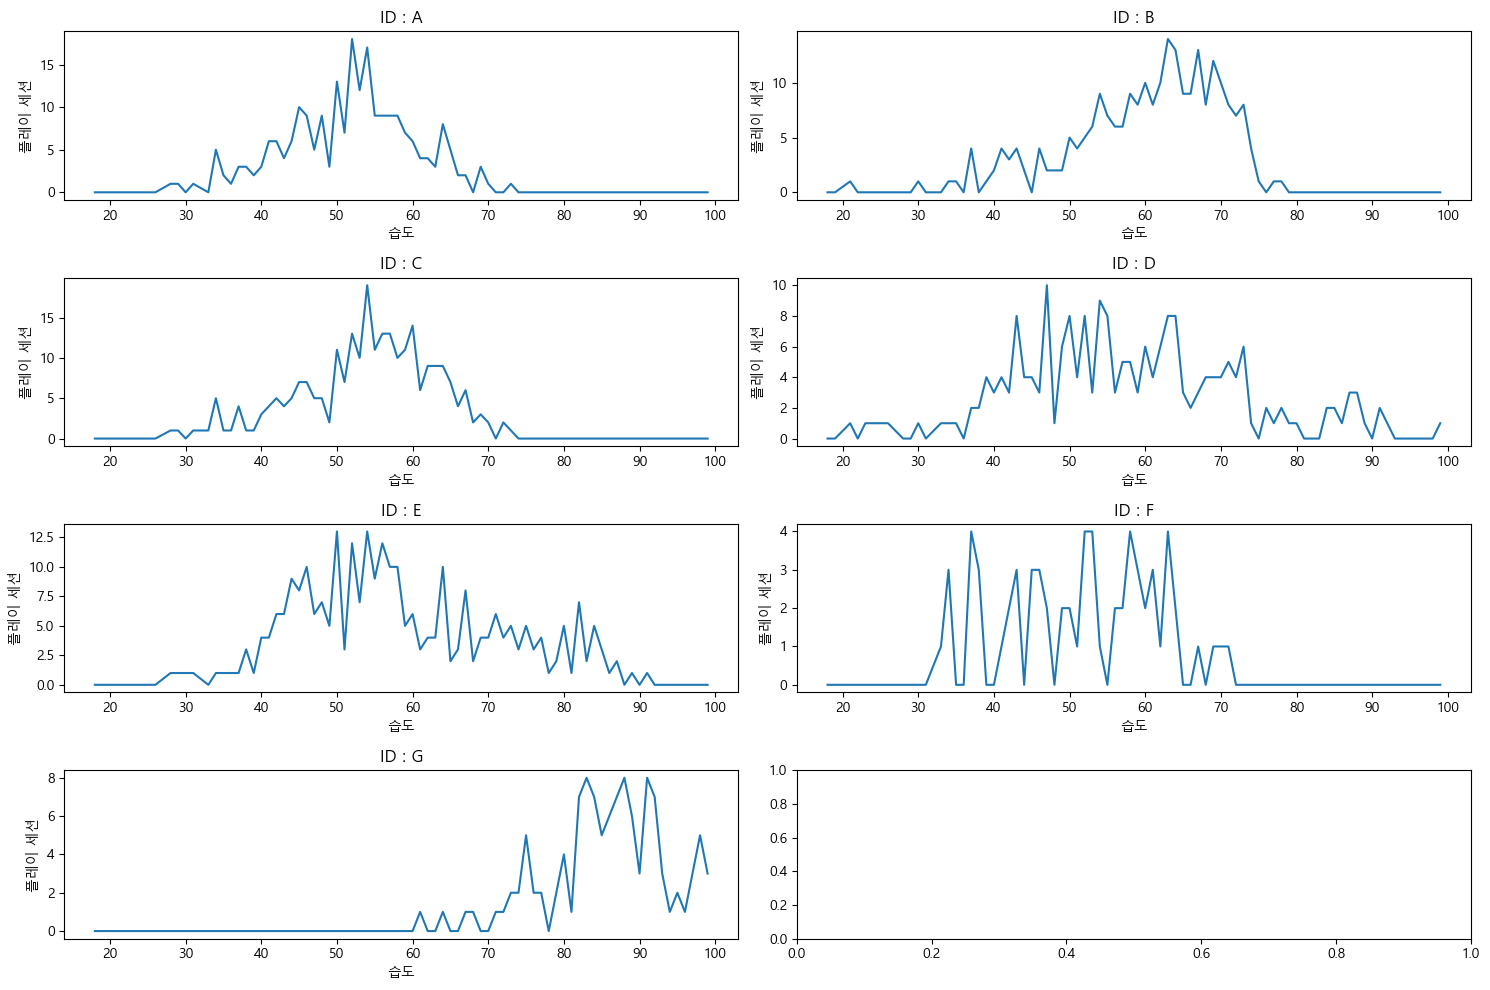

In [12]:
line_plot(golf_df, ['ID', 'Humidity'], 'Play', sns.lineplot, '습도', '플레이 세션', 'sum')

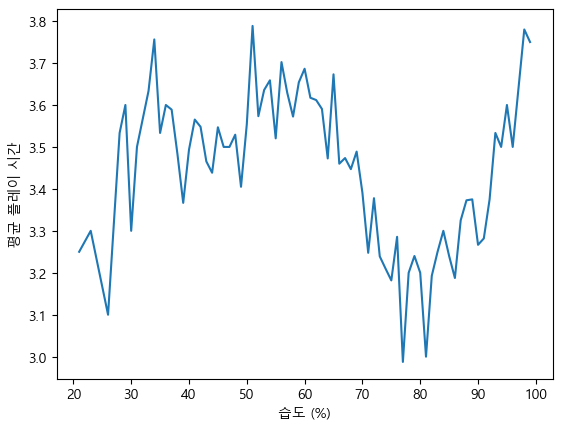

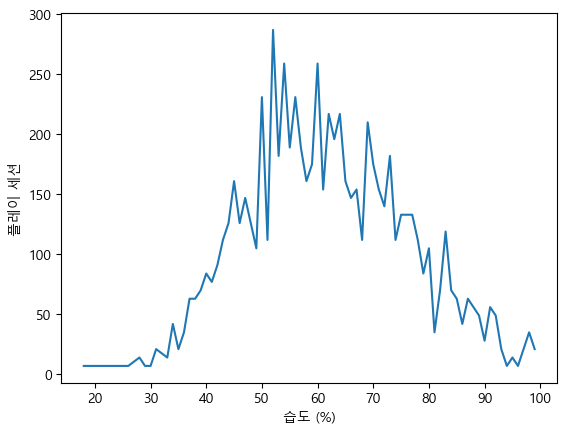

In [13]:
humidity_playtime = played.groupby('Humidity')['PlayTimeHour'].mean().reset_index()
sns.lineplot(data=humidity_playtime, x='Humidity', y='PlayTimeHour')
plt.xlabel('습도 (%)')
plt.ylabel('평균 플레이 시간')
plt.show()

humidity_sessions = golf_df.groupby('Humidity')['Play'].count().reset_index()
sns.lineplot(data=humidity_sessions, x='Humidity', y='Play')
plt.xlabel('습도 (%)')
plt.ylabel('플레이 세션')
plt.show()

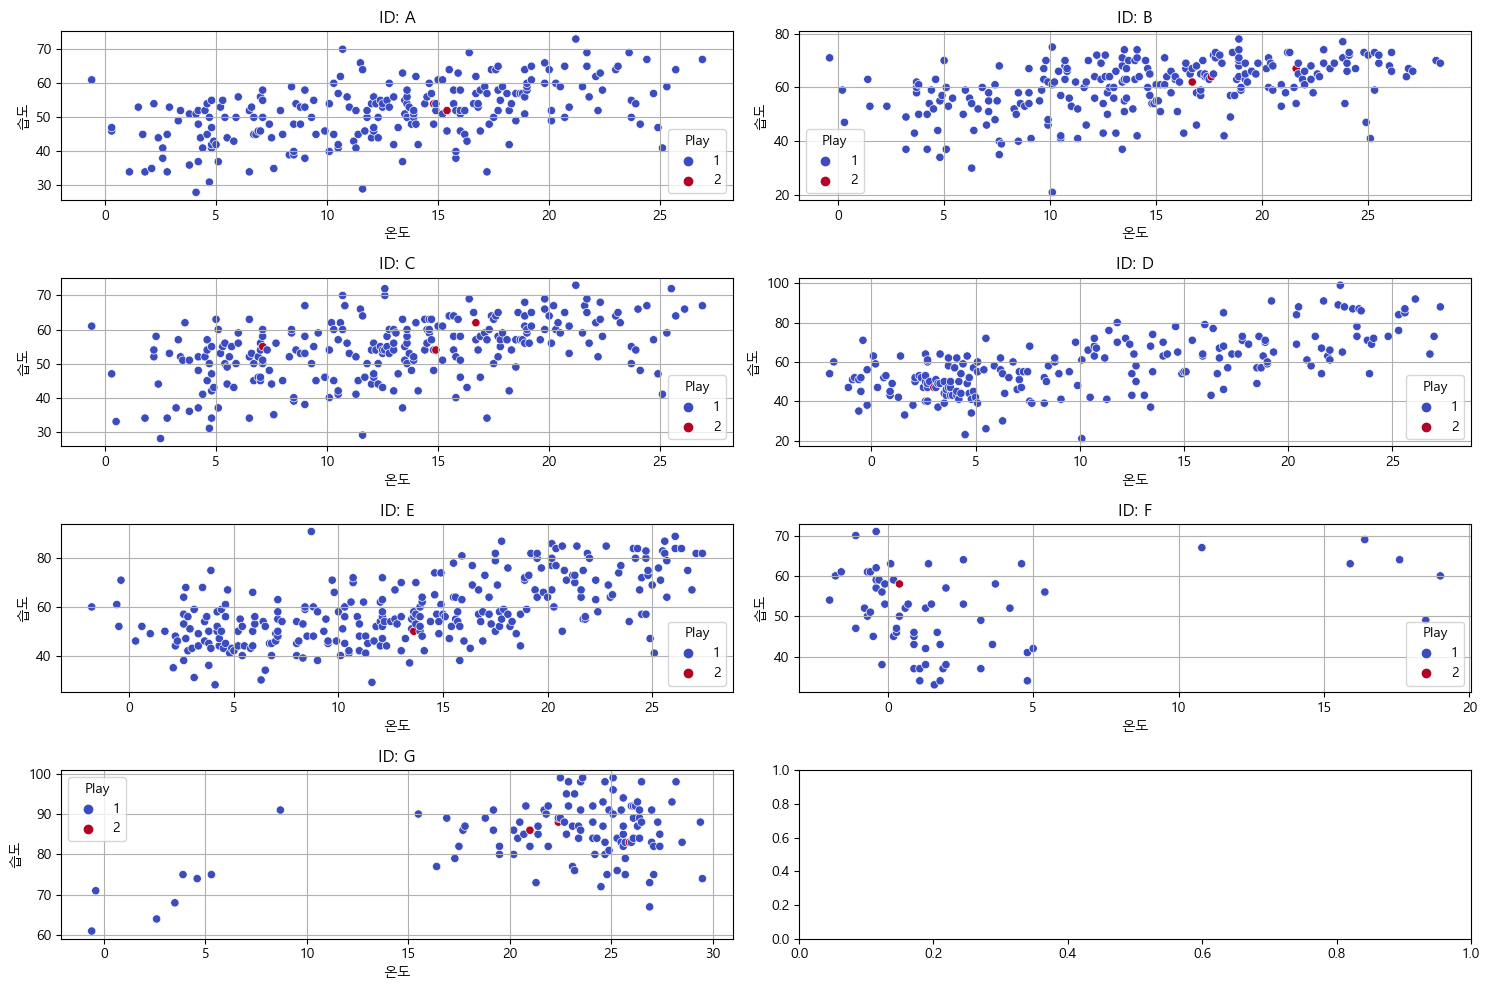

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))  
axes = axes.flatten()

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    temp_humidity_sessions = id_data.groupby(['Temperature', 'Humidity'])['Play'].count().reset_index()
    
    sns.scatterplot(data=temp_humidity_sessions, x='Temperature', y='Humidity', 
                    hue='Play', palette='coolwarm', legend=True, ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('온도')
    ax.set_ylabel('습도')
    ax.grid(True)

plt.tight_layout()
plt.show()

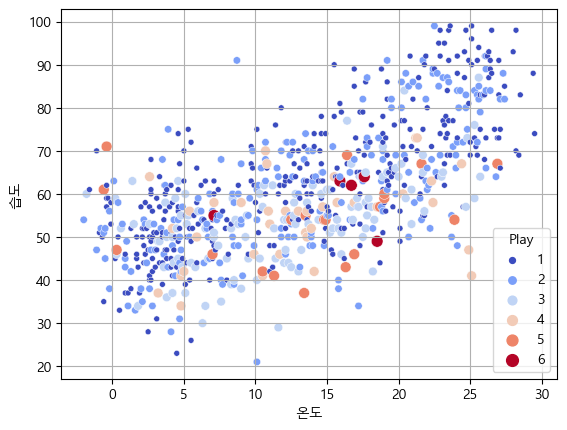

In [15]:
temp_humidity_sessions = played.groupby(['Temperature', 'Humidity'])['Play'].count().reset_index()

sns.scatterplot(data=temp_humidity_sessions, x='Temperature', y='Humidity', size='Play', 
                hue='Play', palette='coolwarm', legend=True)
plt.xlabel('온도')
plt.ylabel('습도')
plt.grid(True)
plt.show()

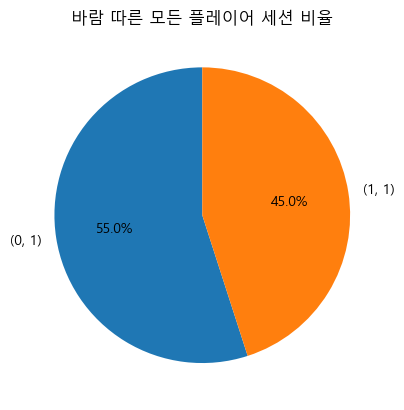

In [16]:
windy_sessions = played.groupby('Windy')['Play'].value_counts()

plt.pie(windy_sessions, labels=windy_sessions.index, autopct='%1.1f%%', 
        startangle=90)
plt.title('바람 따른 모든 플레이어 세션 비율')
plt.show()

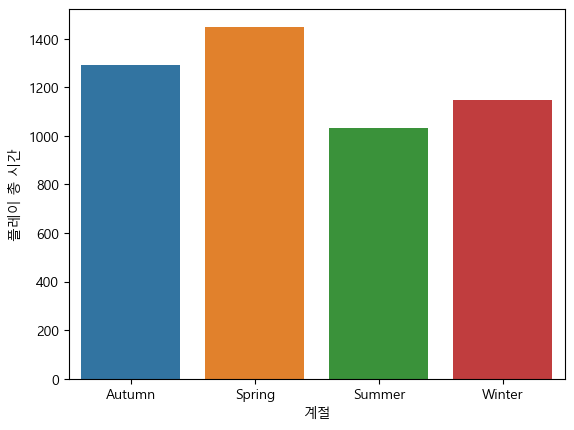

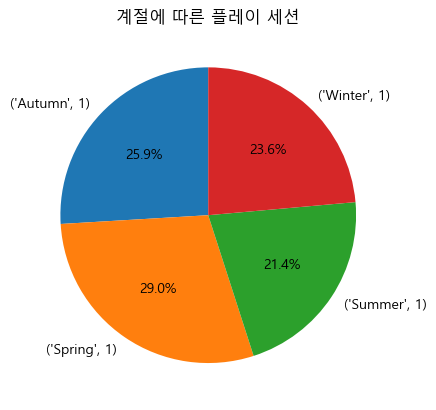

In [17]:
Season_playtime = golf_df.groupby('Season')['PlayTimeHour'].sum().reset_index()

sns.barplot(data=Season_playtime, x='Season', y='PlayTimeHour')
plt.xlabel('계절')
plt.ylabel('플레이 총 시간')
plt.show()

Season_sessions = played.groupby('Season')['Play'].value_counts()

plt.pie(Season_sessions, labels=Season_sessions.index, autopct='%1.1f%%', 
        startangle=90)
plt.title('계절에 따른 플레이 세션')
plt.show()

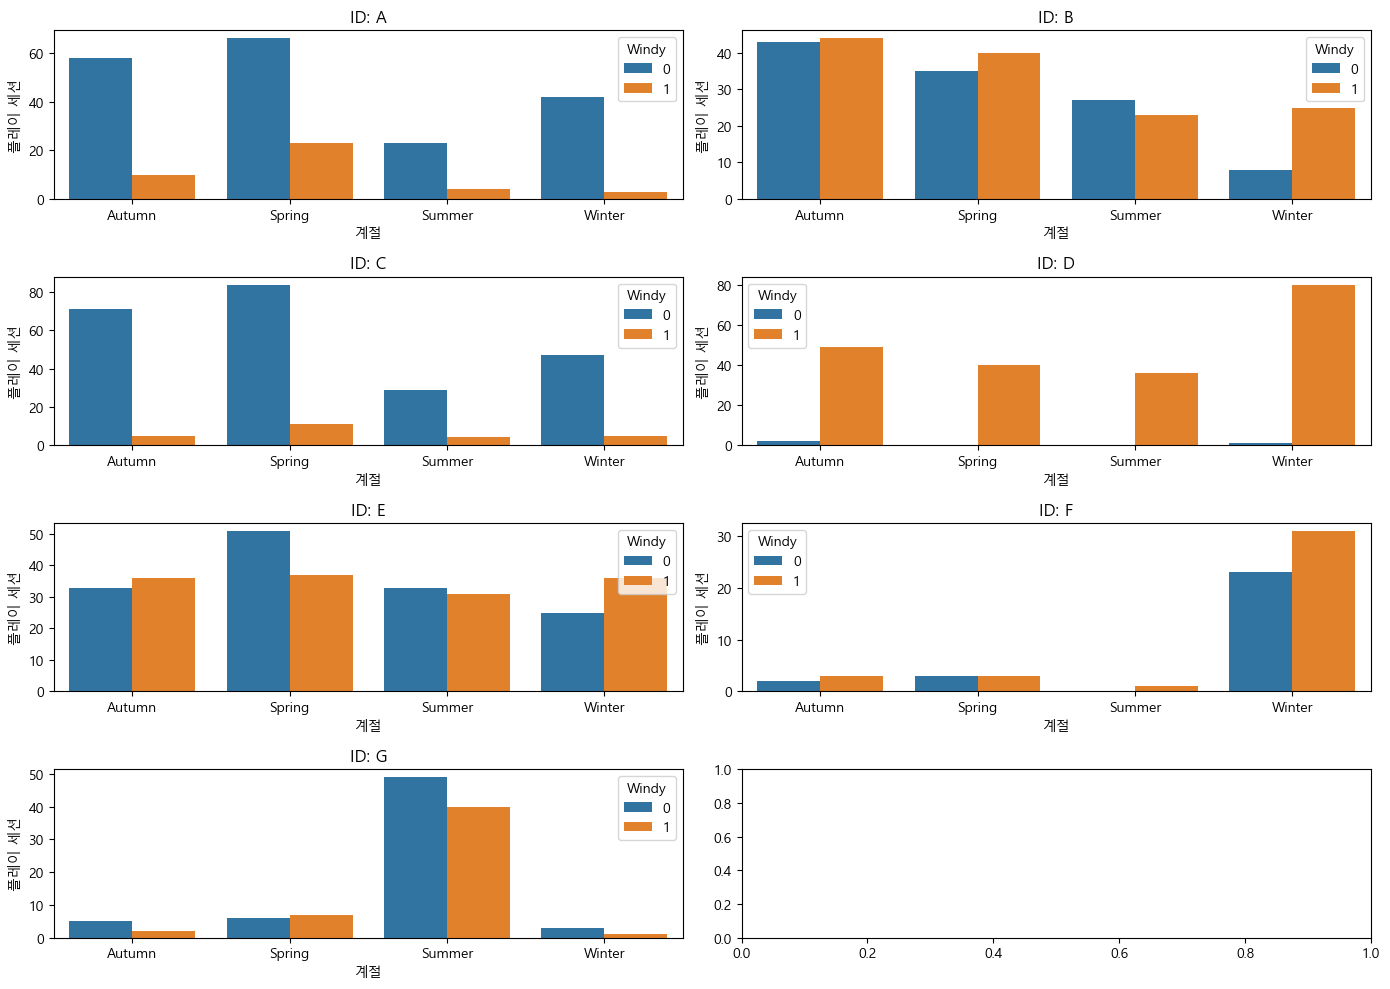

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    season_windy_playtime = id_data.groupby(['Season', 'Windy'])['Play'].sum().reset_index()
    sns.barplot(data=season_windy_playtime, x='Season', y='Play', hue='Windy', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('계절')
    ax.set_ylabel('플레이 세션')

plt.tight_layout()
plt.show()

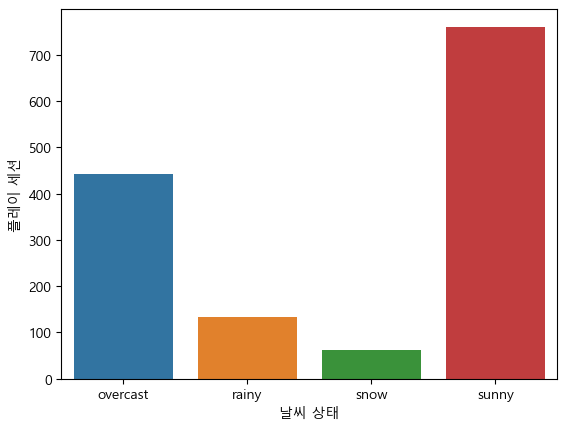

In [19]:
outlook_sessions = played.groupby('Outlook')['Play'].count().reset_index()

sns.barplot(data=outlook_sessions, x='Outlook', y='Play')
plt.xlabel('날씨 상태')
plt.ylabel('플레이 세션')
plt.show()

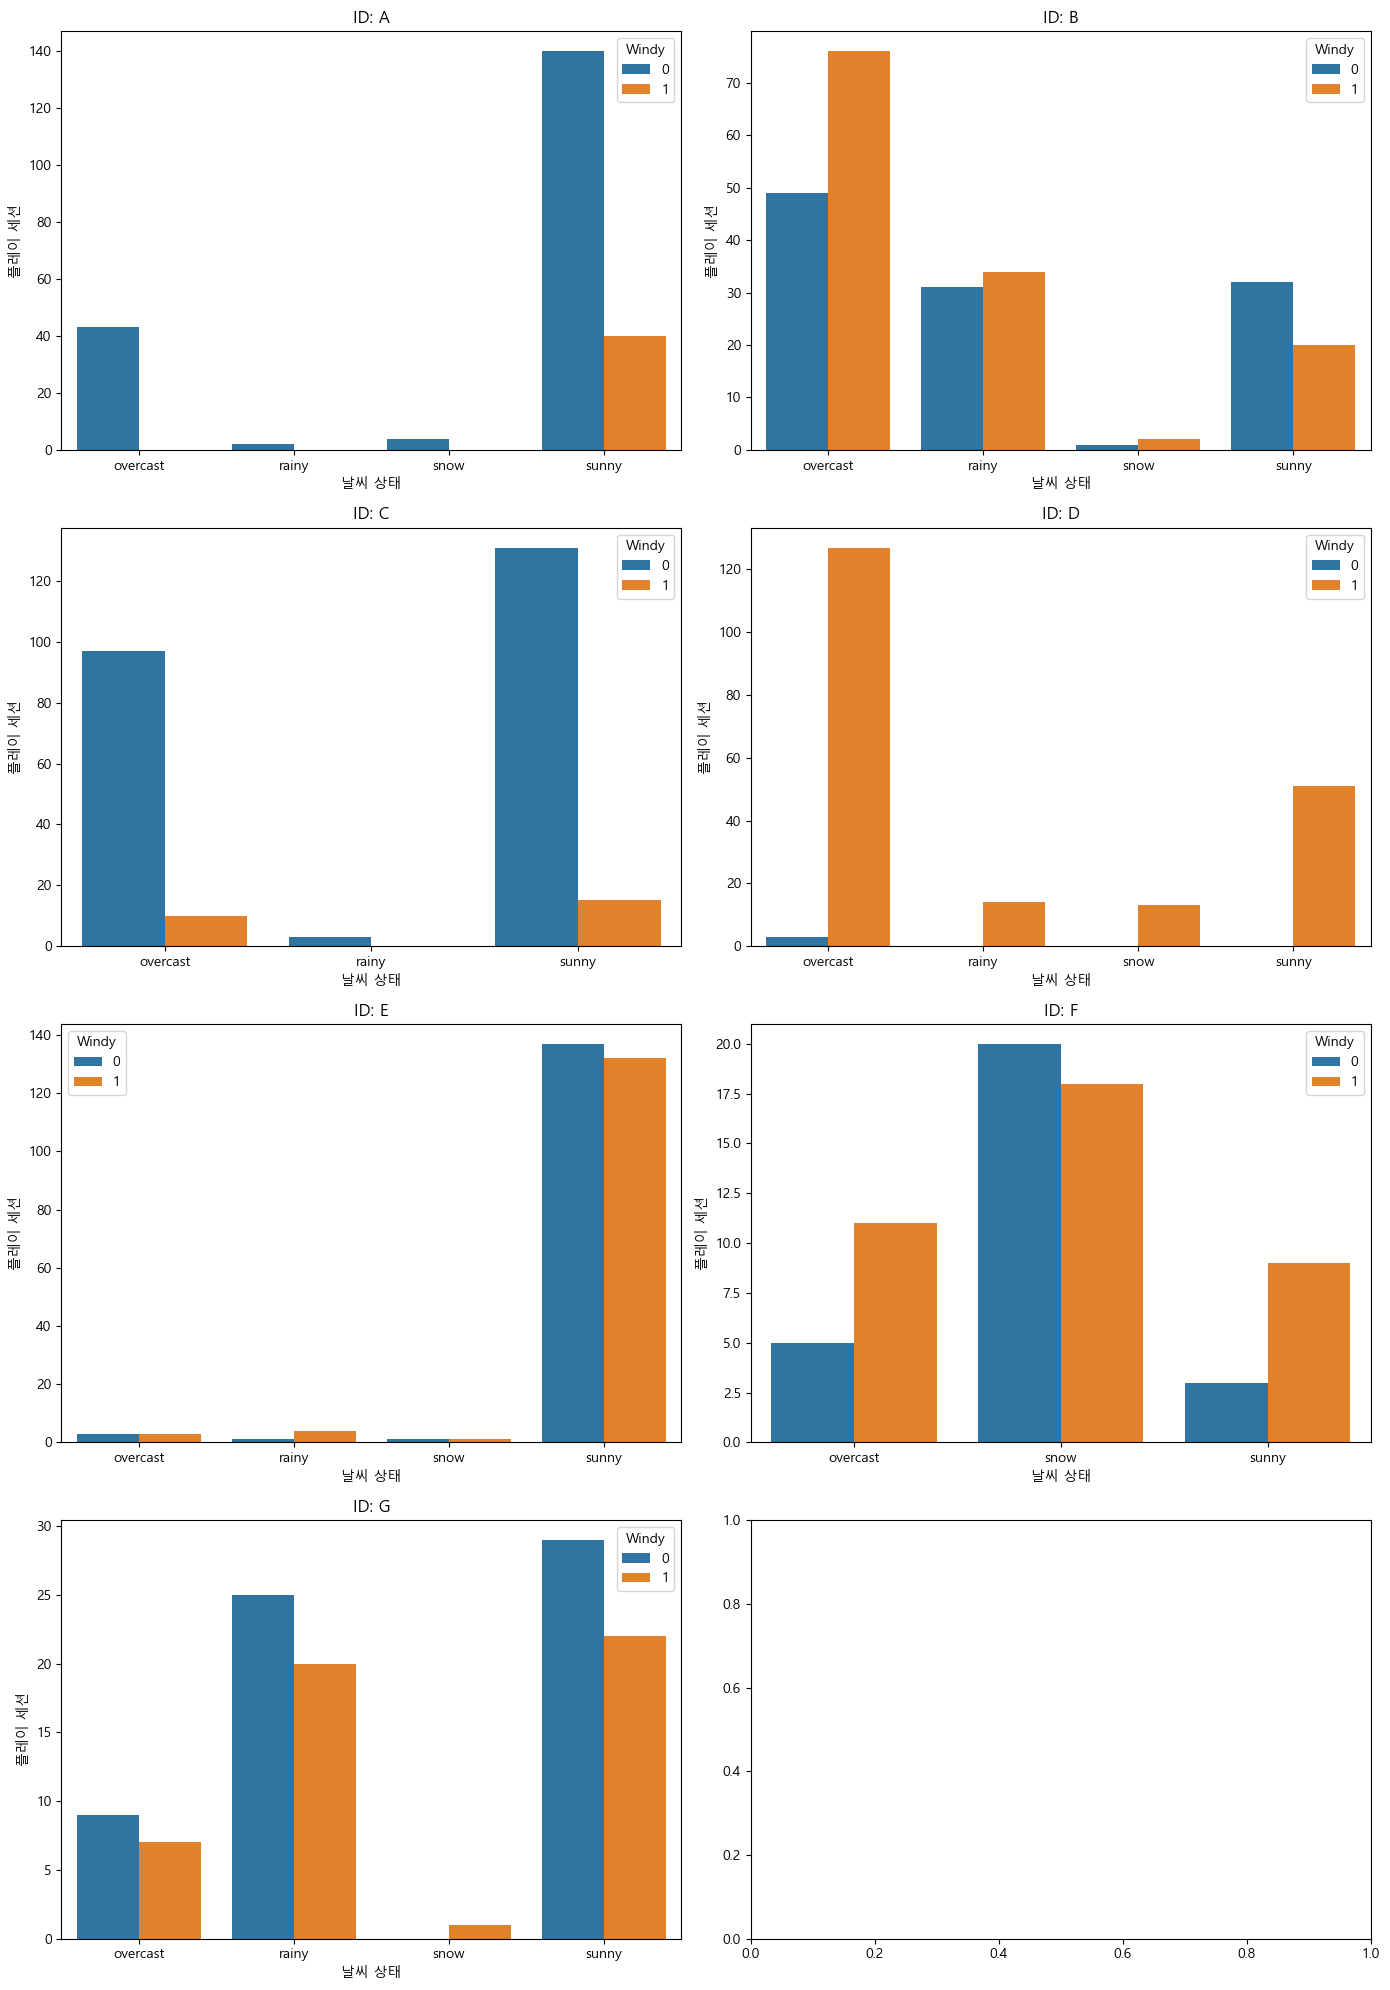

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 5 * 4))
axes = axes.flatten()

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    outlook_windy_play = id_data.groupby(['Outlook', 'Windy'])['Play'].sum().reset_index()
    sns.barplot(data=outlook_windy_play, x='Outlook', y='Play', hue='Windy', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('날씨 상태')
    ax.set_ylabel('플레이 세션')

plt.tight_layout()
plt.show()

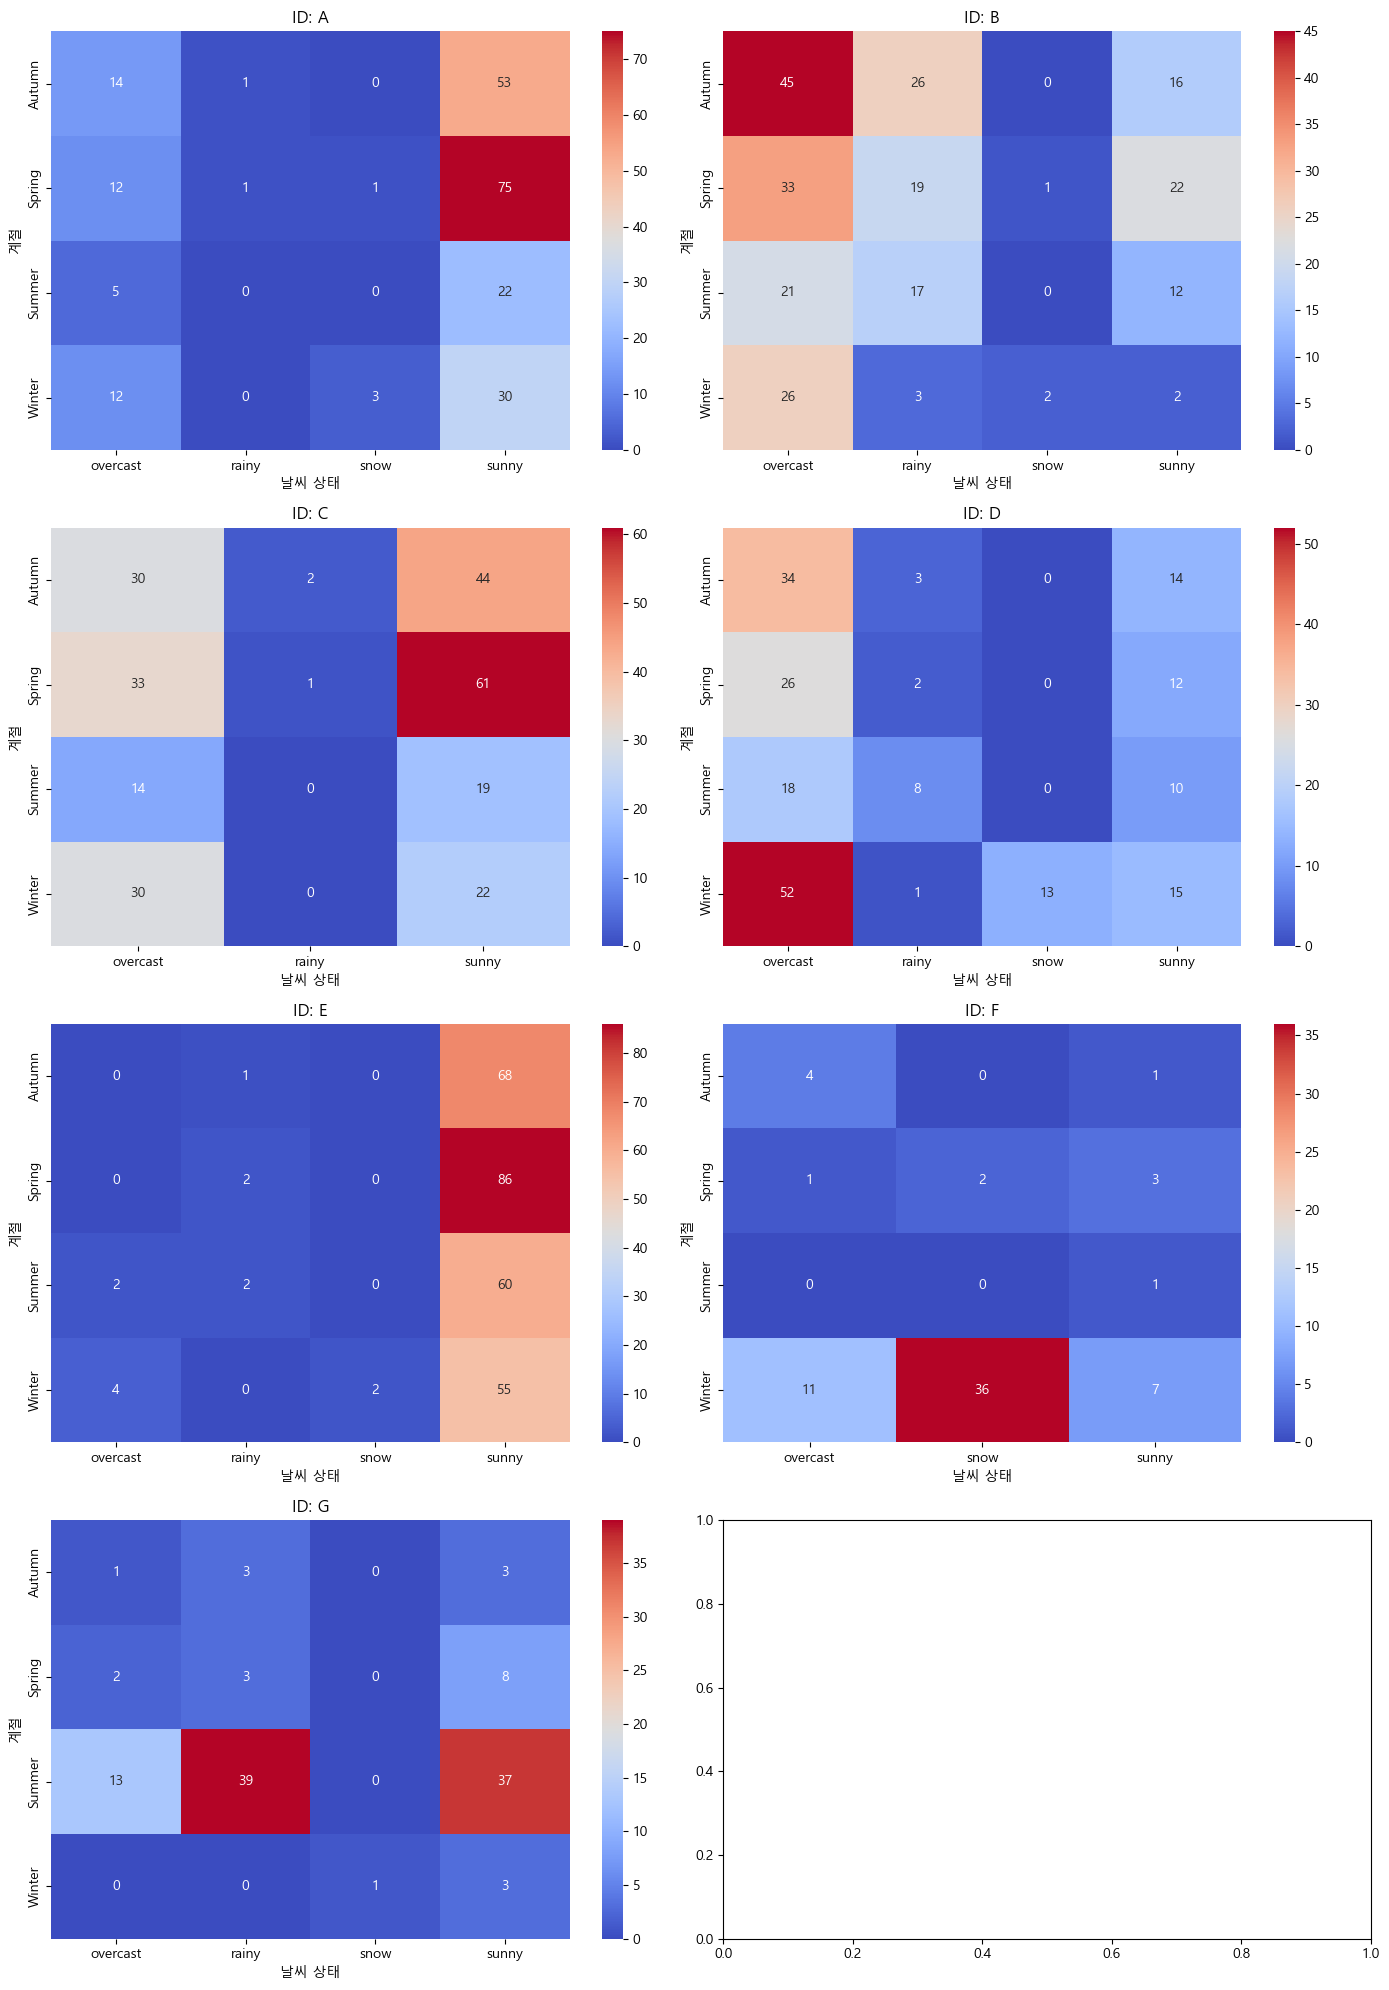

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 5 * 4))
axes = axes.flatten()  

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    season_outlook_play_sessions = id_data.groupby(['Season', 'Outlook']).size().unstack(fill_value=0)
    
    sns.heatmap(season_outlook_play_sessions, annot=True, cmap='coolwarm', fmt='g', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('날씨 상태')
    ax.set_ylabel('계절')

plt.tight_layout()
plt.show()

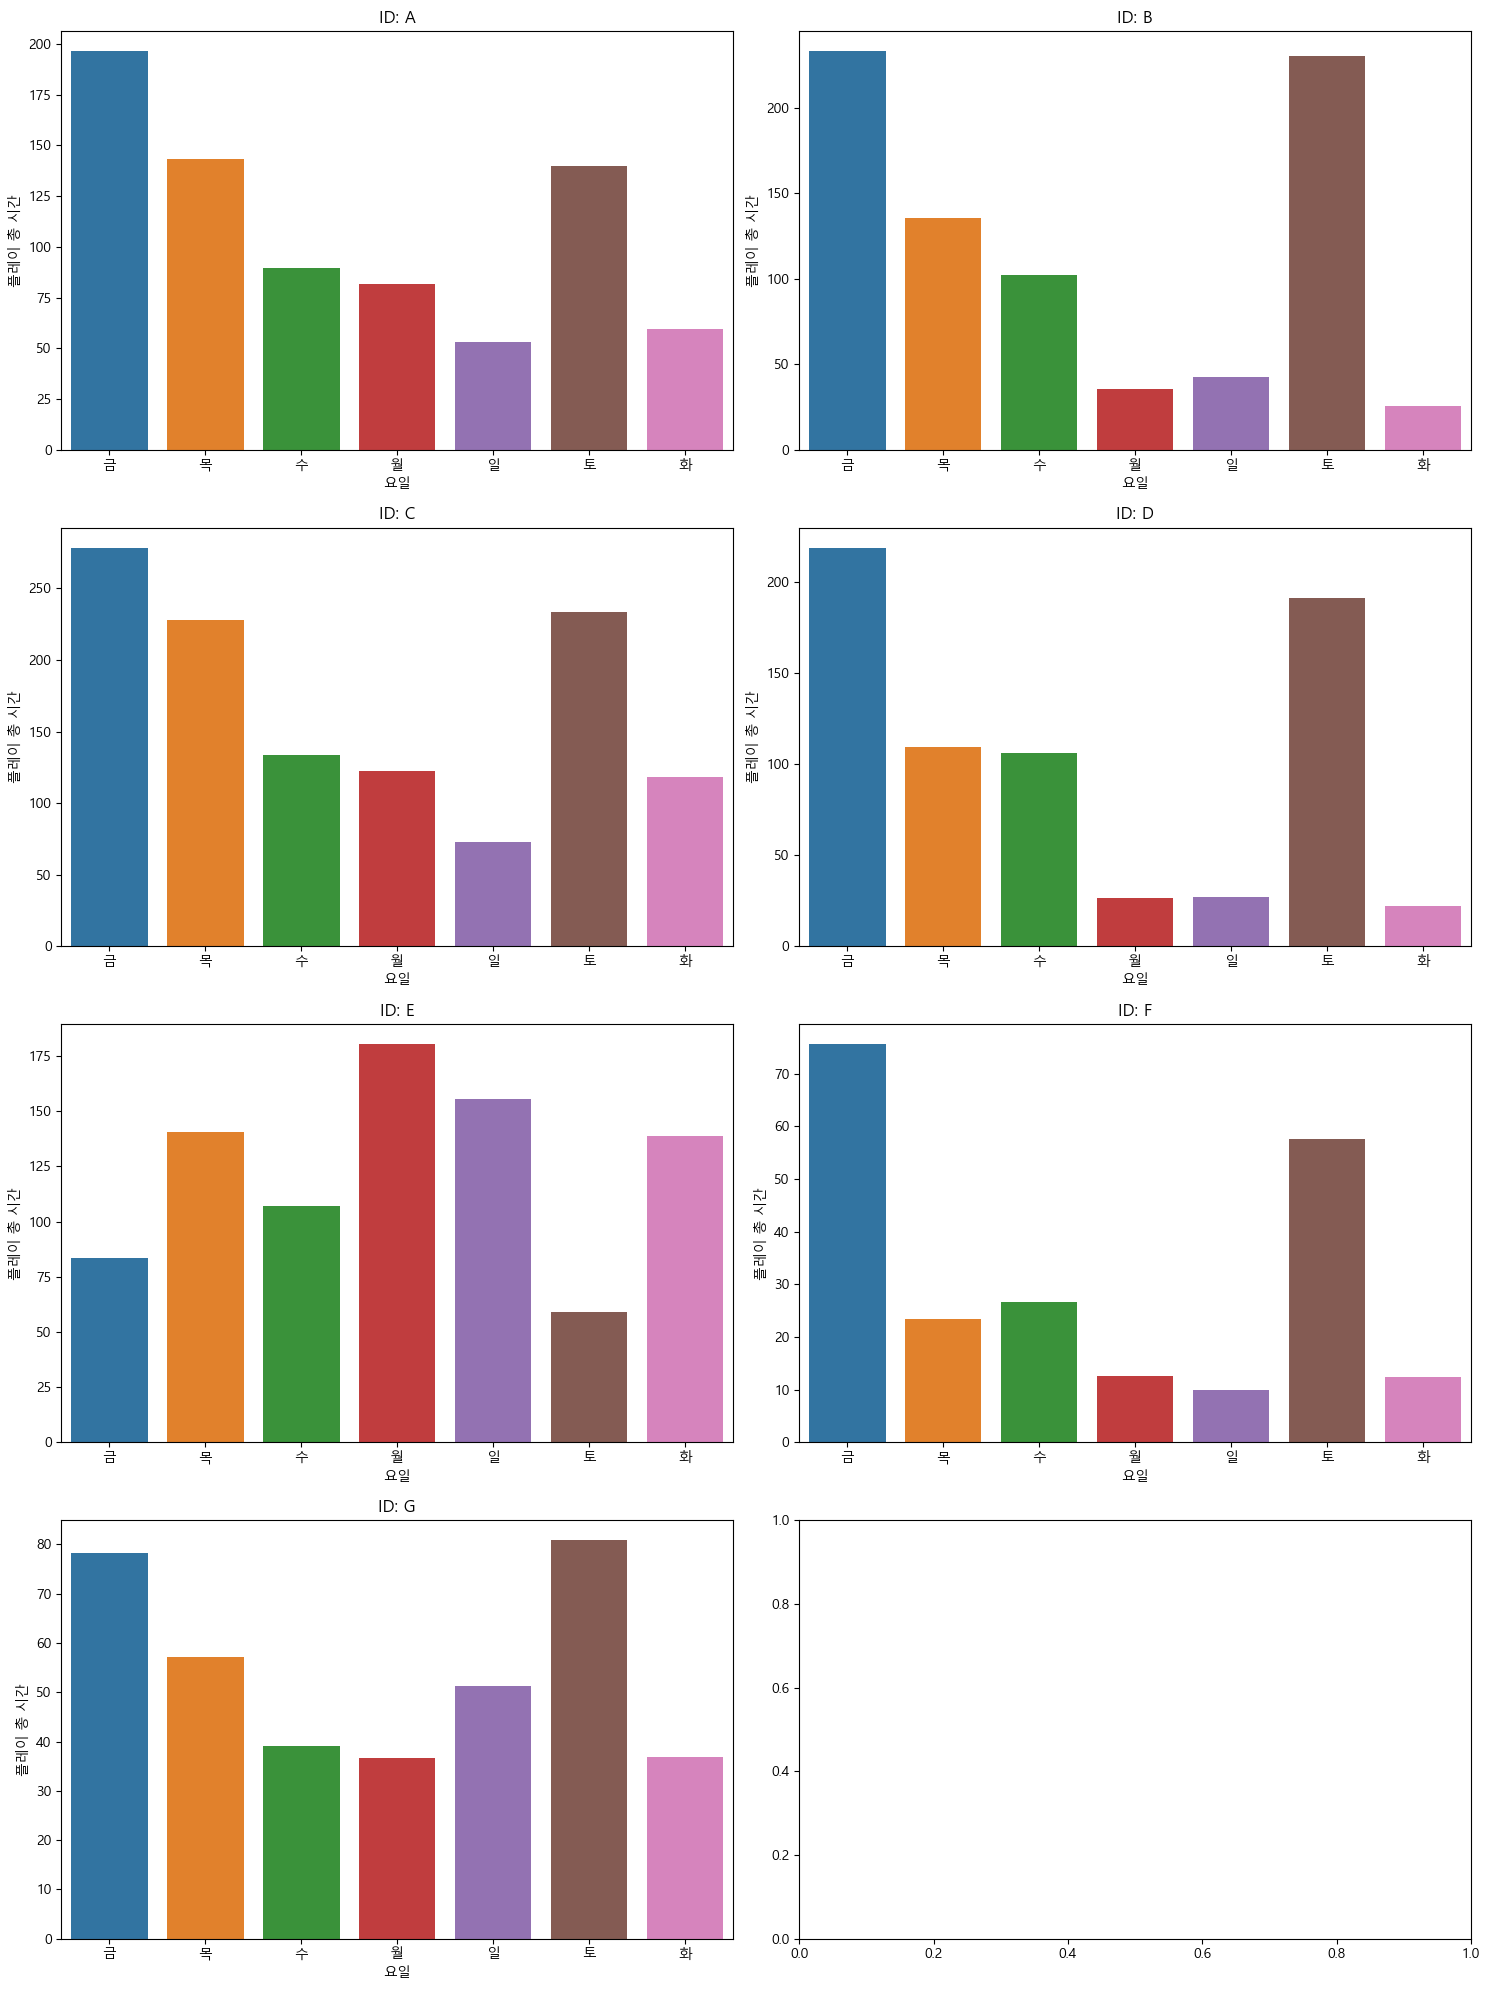

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
axes = axes.flatten() 

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    weekday_playtime = id_data.groupby('Weekday_Num')['PlayTimeHour'].sum().reset_index()
    
    sns.barplot(data=weekday_playtime, x='Weekday_Num', y='PlayTimeHour', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('요일')
    ax.set_ylabel('플레이 총 시간')

plt.tight_layout()
plt.show()

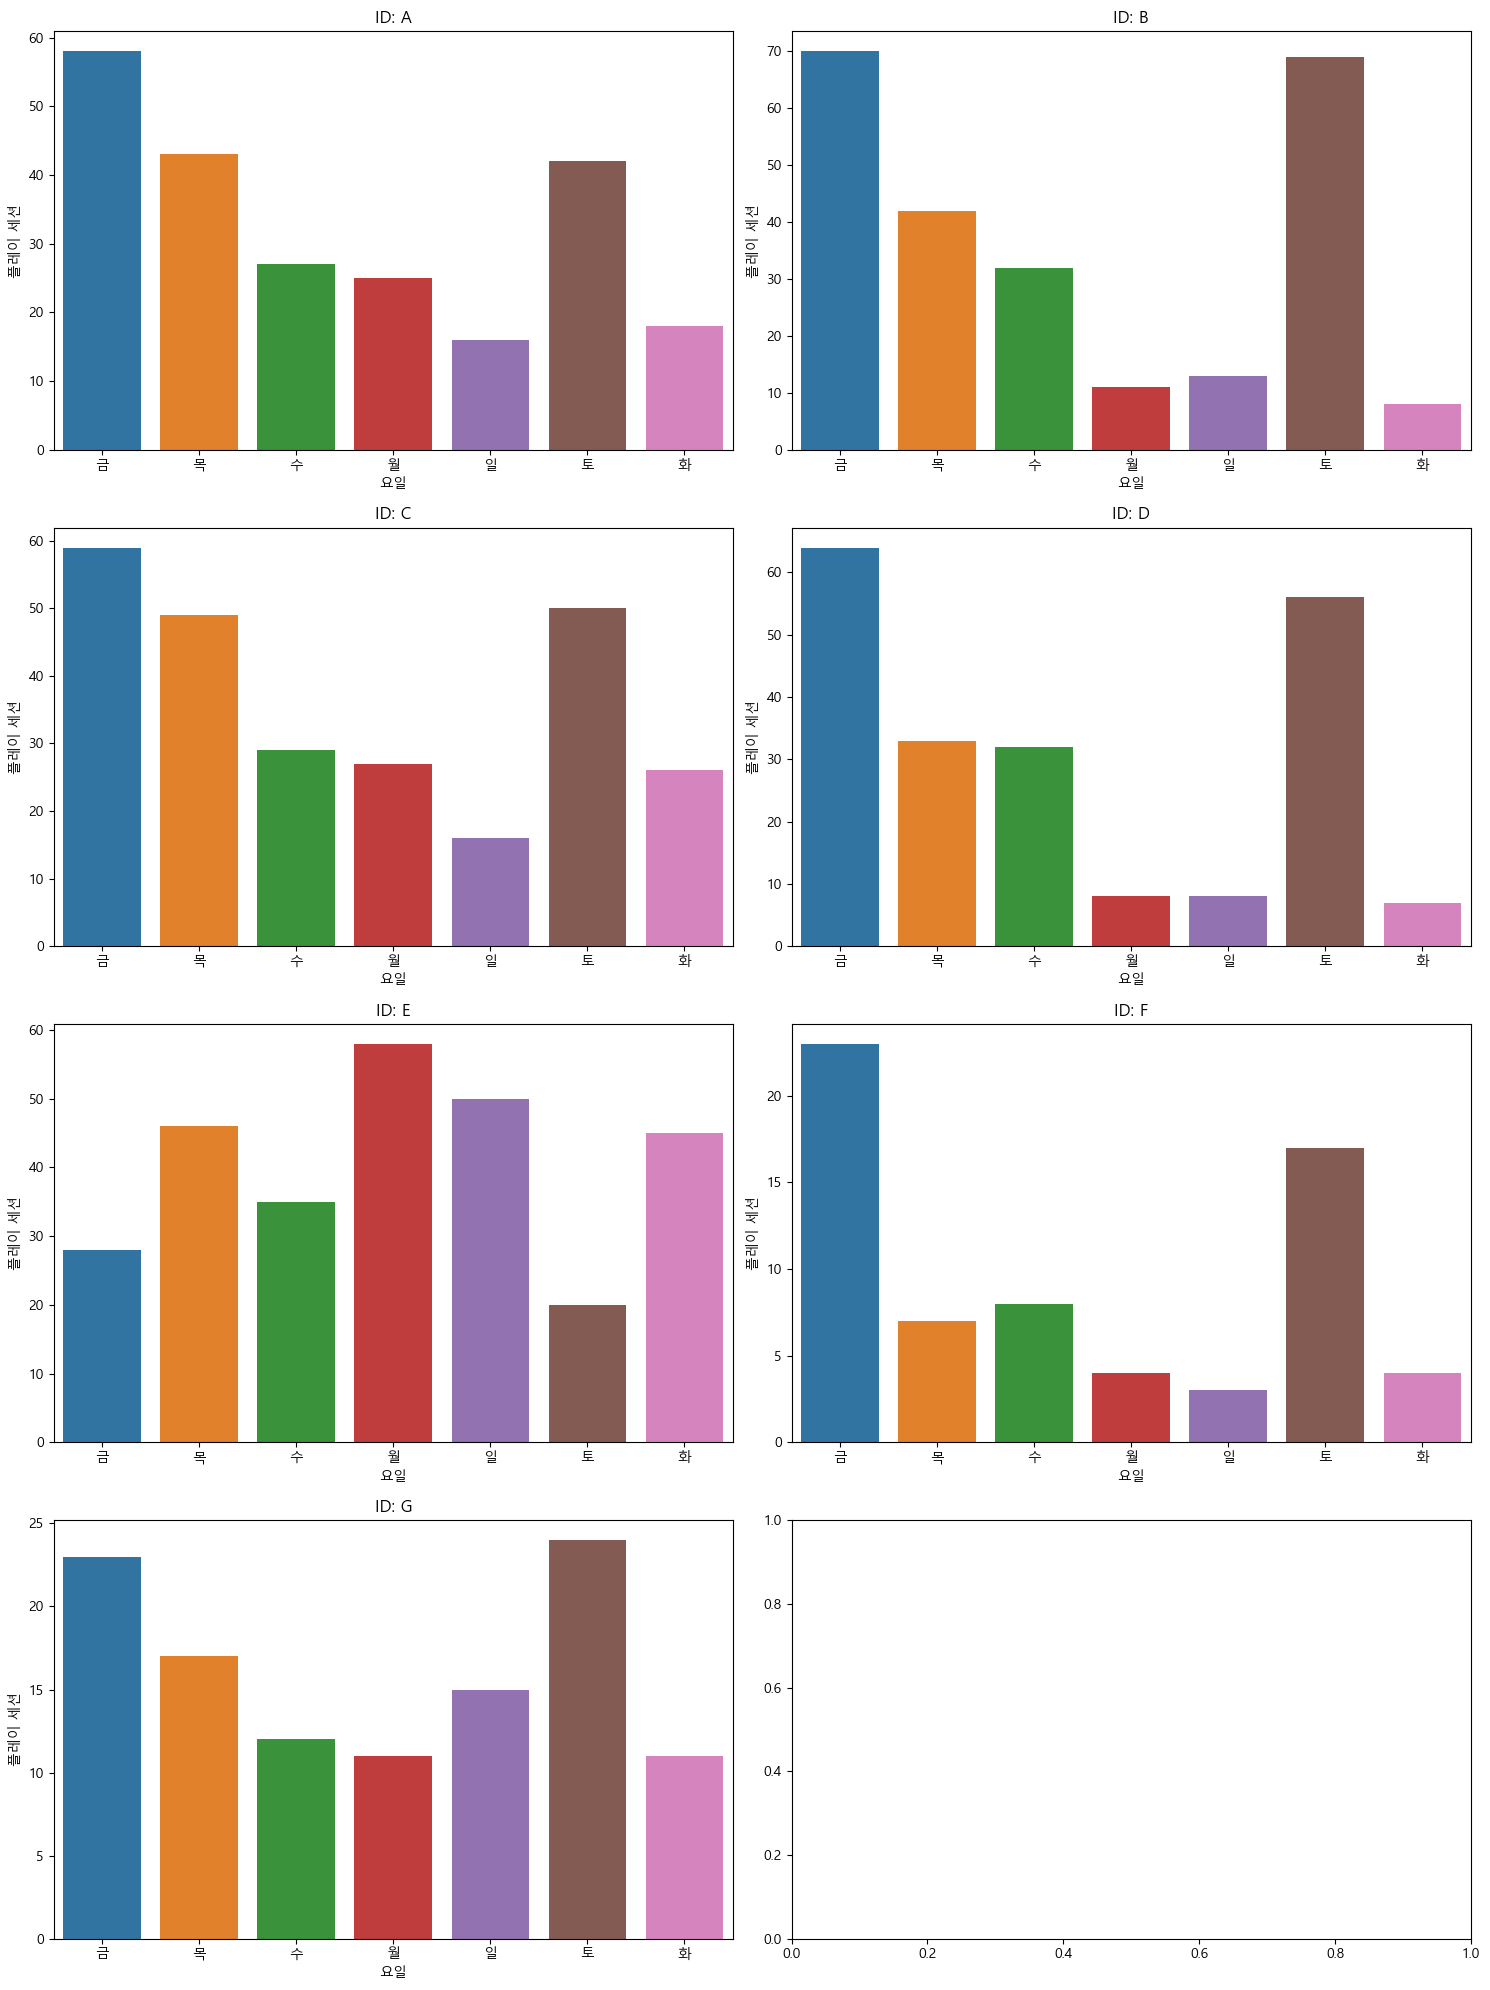

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
axes = axes.flatten() 

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    weekday_playtime = id_data.groupby('Weekday_Num')['Play'].sum().reset_index()
    
    sns.barplot(data=weekday_playtime, x='Weekday_Num', y='Play', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('요일')
    ax.set_ylabel('플레이 세션')

plt.tight_layout()
plt.show()

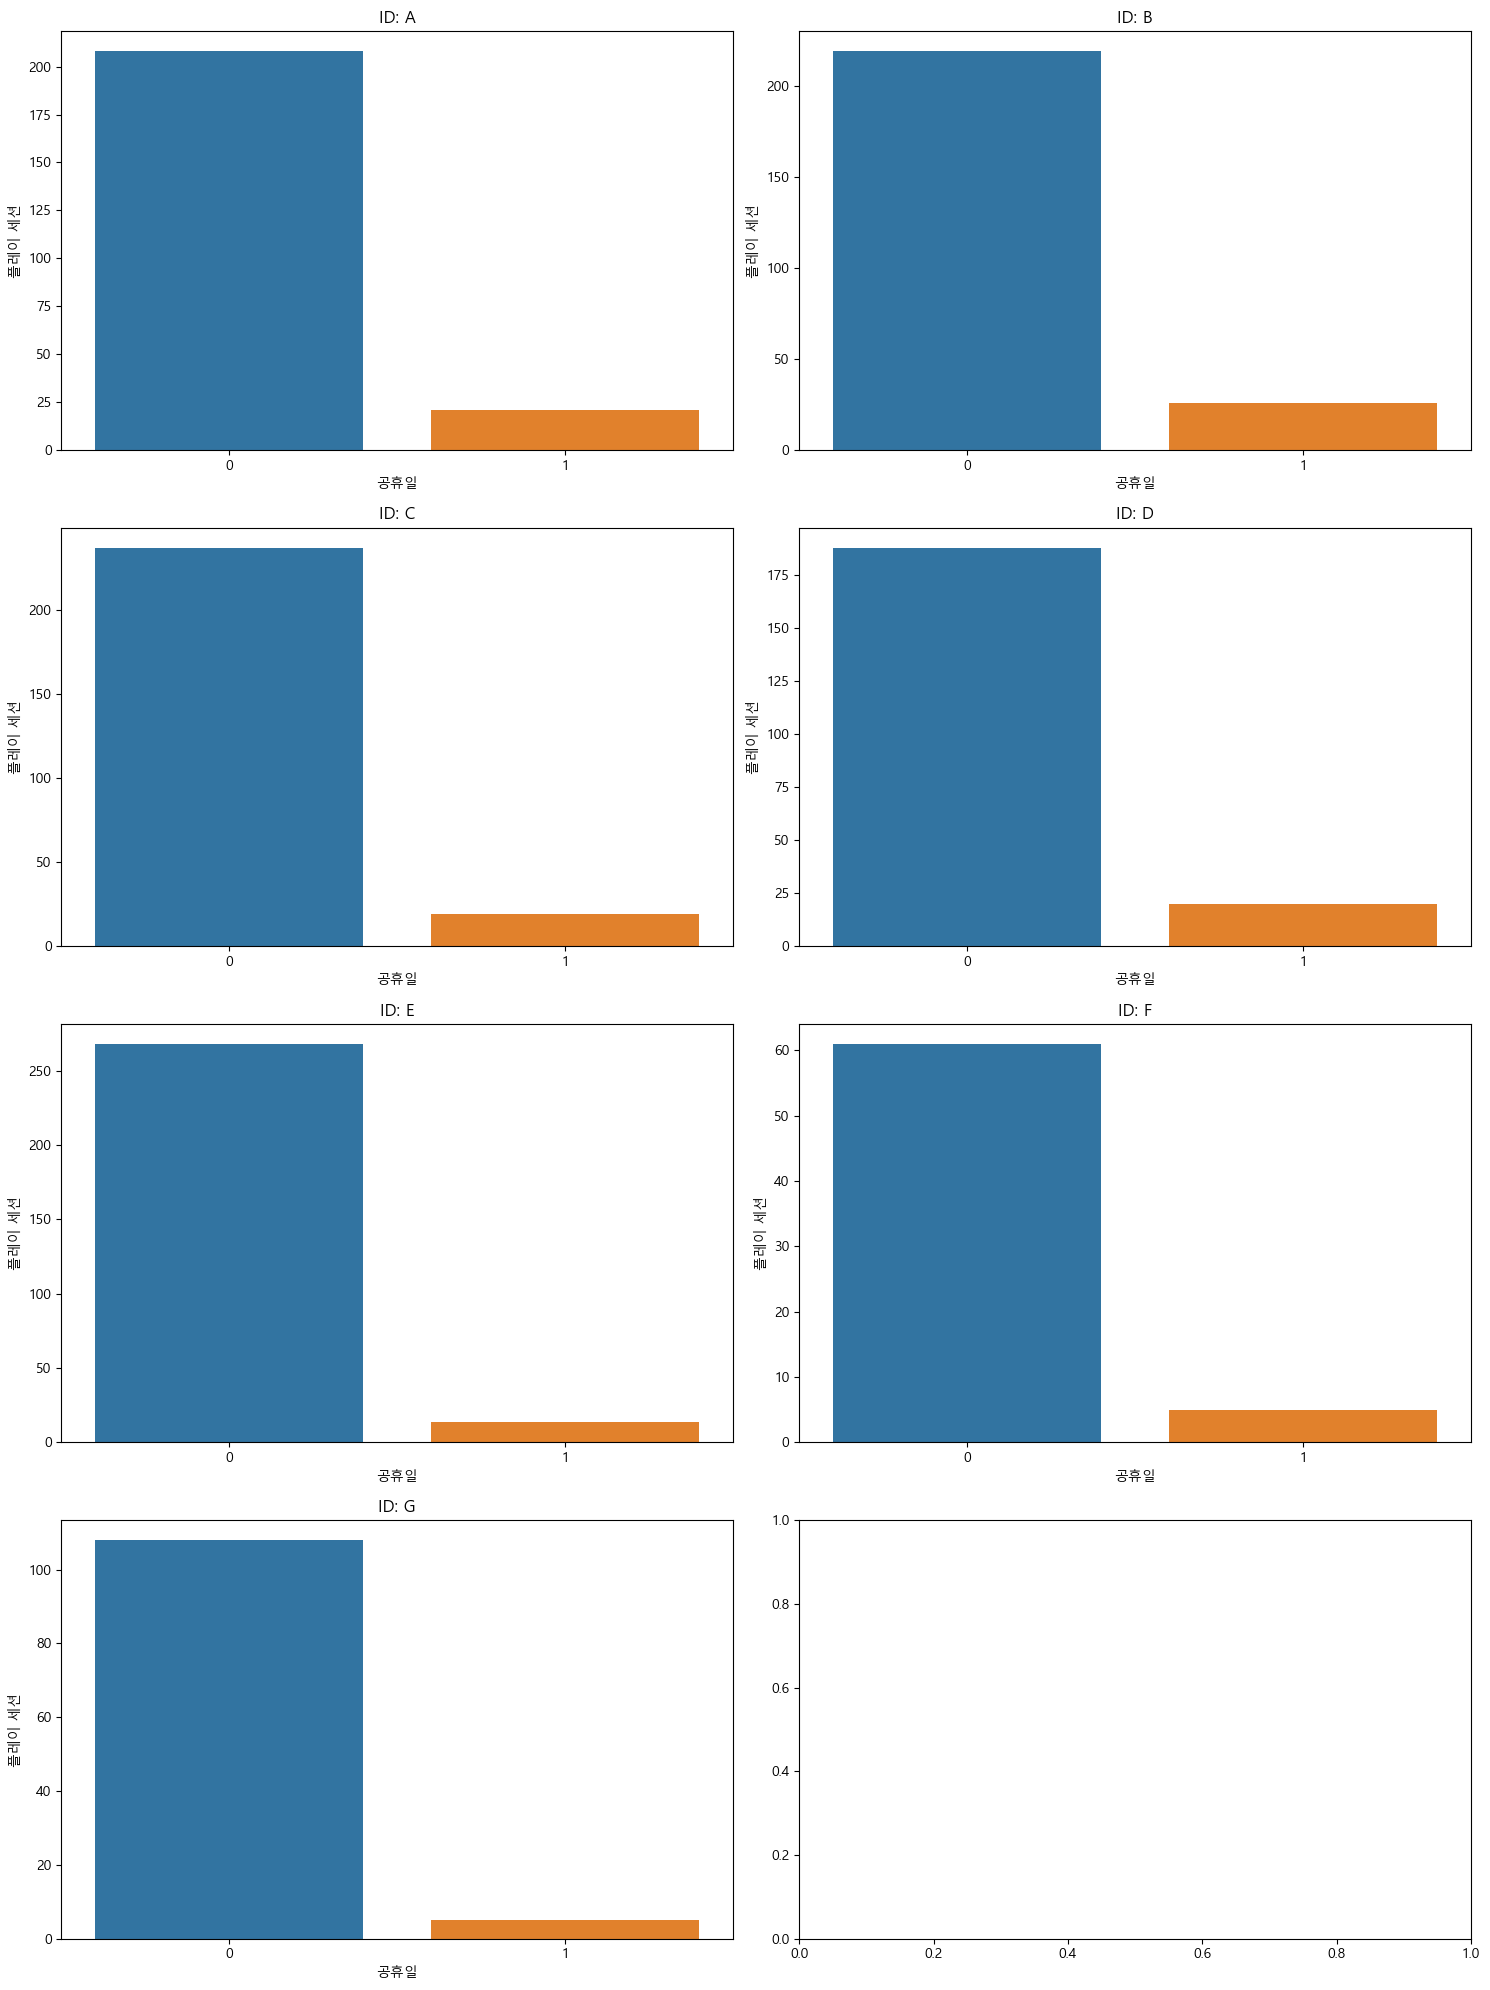

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
axes = axes.flatten()  

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    holiday_play_sum = id_data.groupby('Holiday')['Play'].sum().reset_index()
    sns.barplot(data=holiday_play_sum, x='Holiday', y='Play', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('공휴일')
    ax.set_ylabel('플레이 세션')

plt.tight_layout()
plt.show()

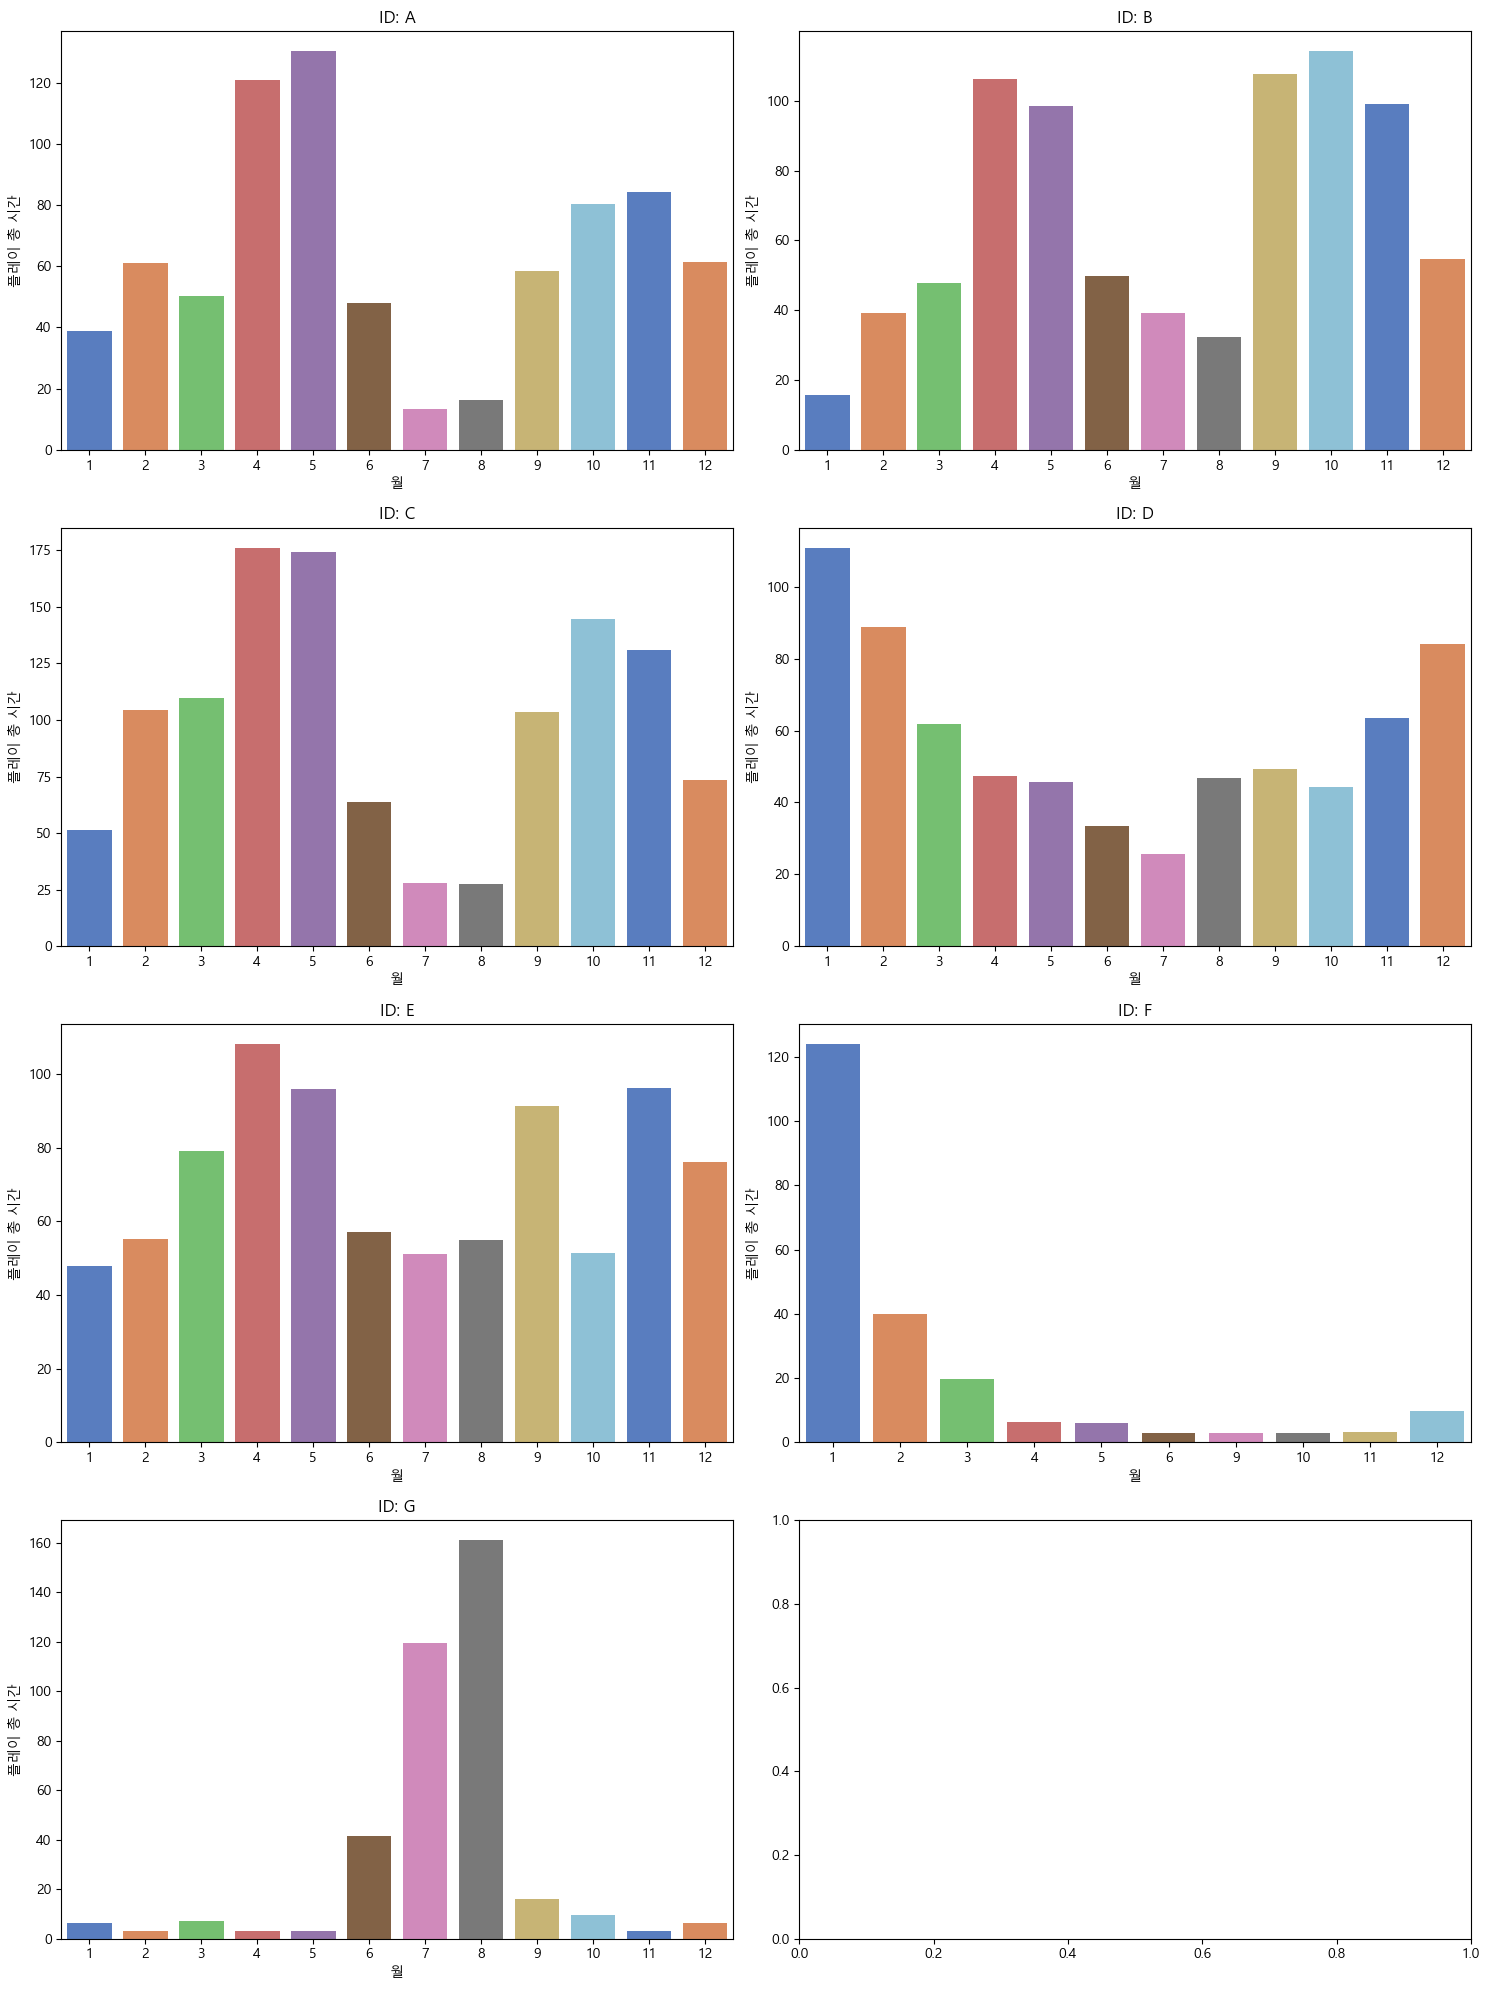

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
axes = axes.flatten()  

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]

    Month_play = id_data.groupby('Month_Num')['PlayTimeHour'].sum().reset_index()
    sns.barplot(data=Month_play, x='Month_Num', y='PlayTimeHour', ax=ax, palette='muted')

    ax.set_title(f'ID: {id}')
    ax.set_xlabel('월')
    ax.set_ylabel('플레이 총 시간')

plt.tight_layout()
plt.show()

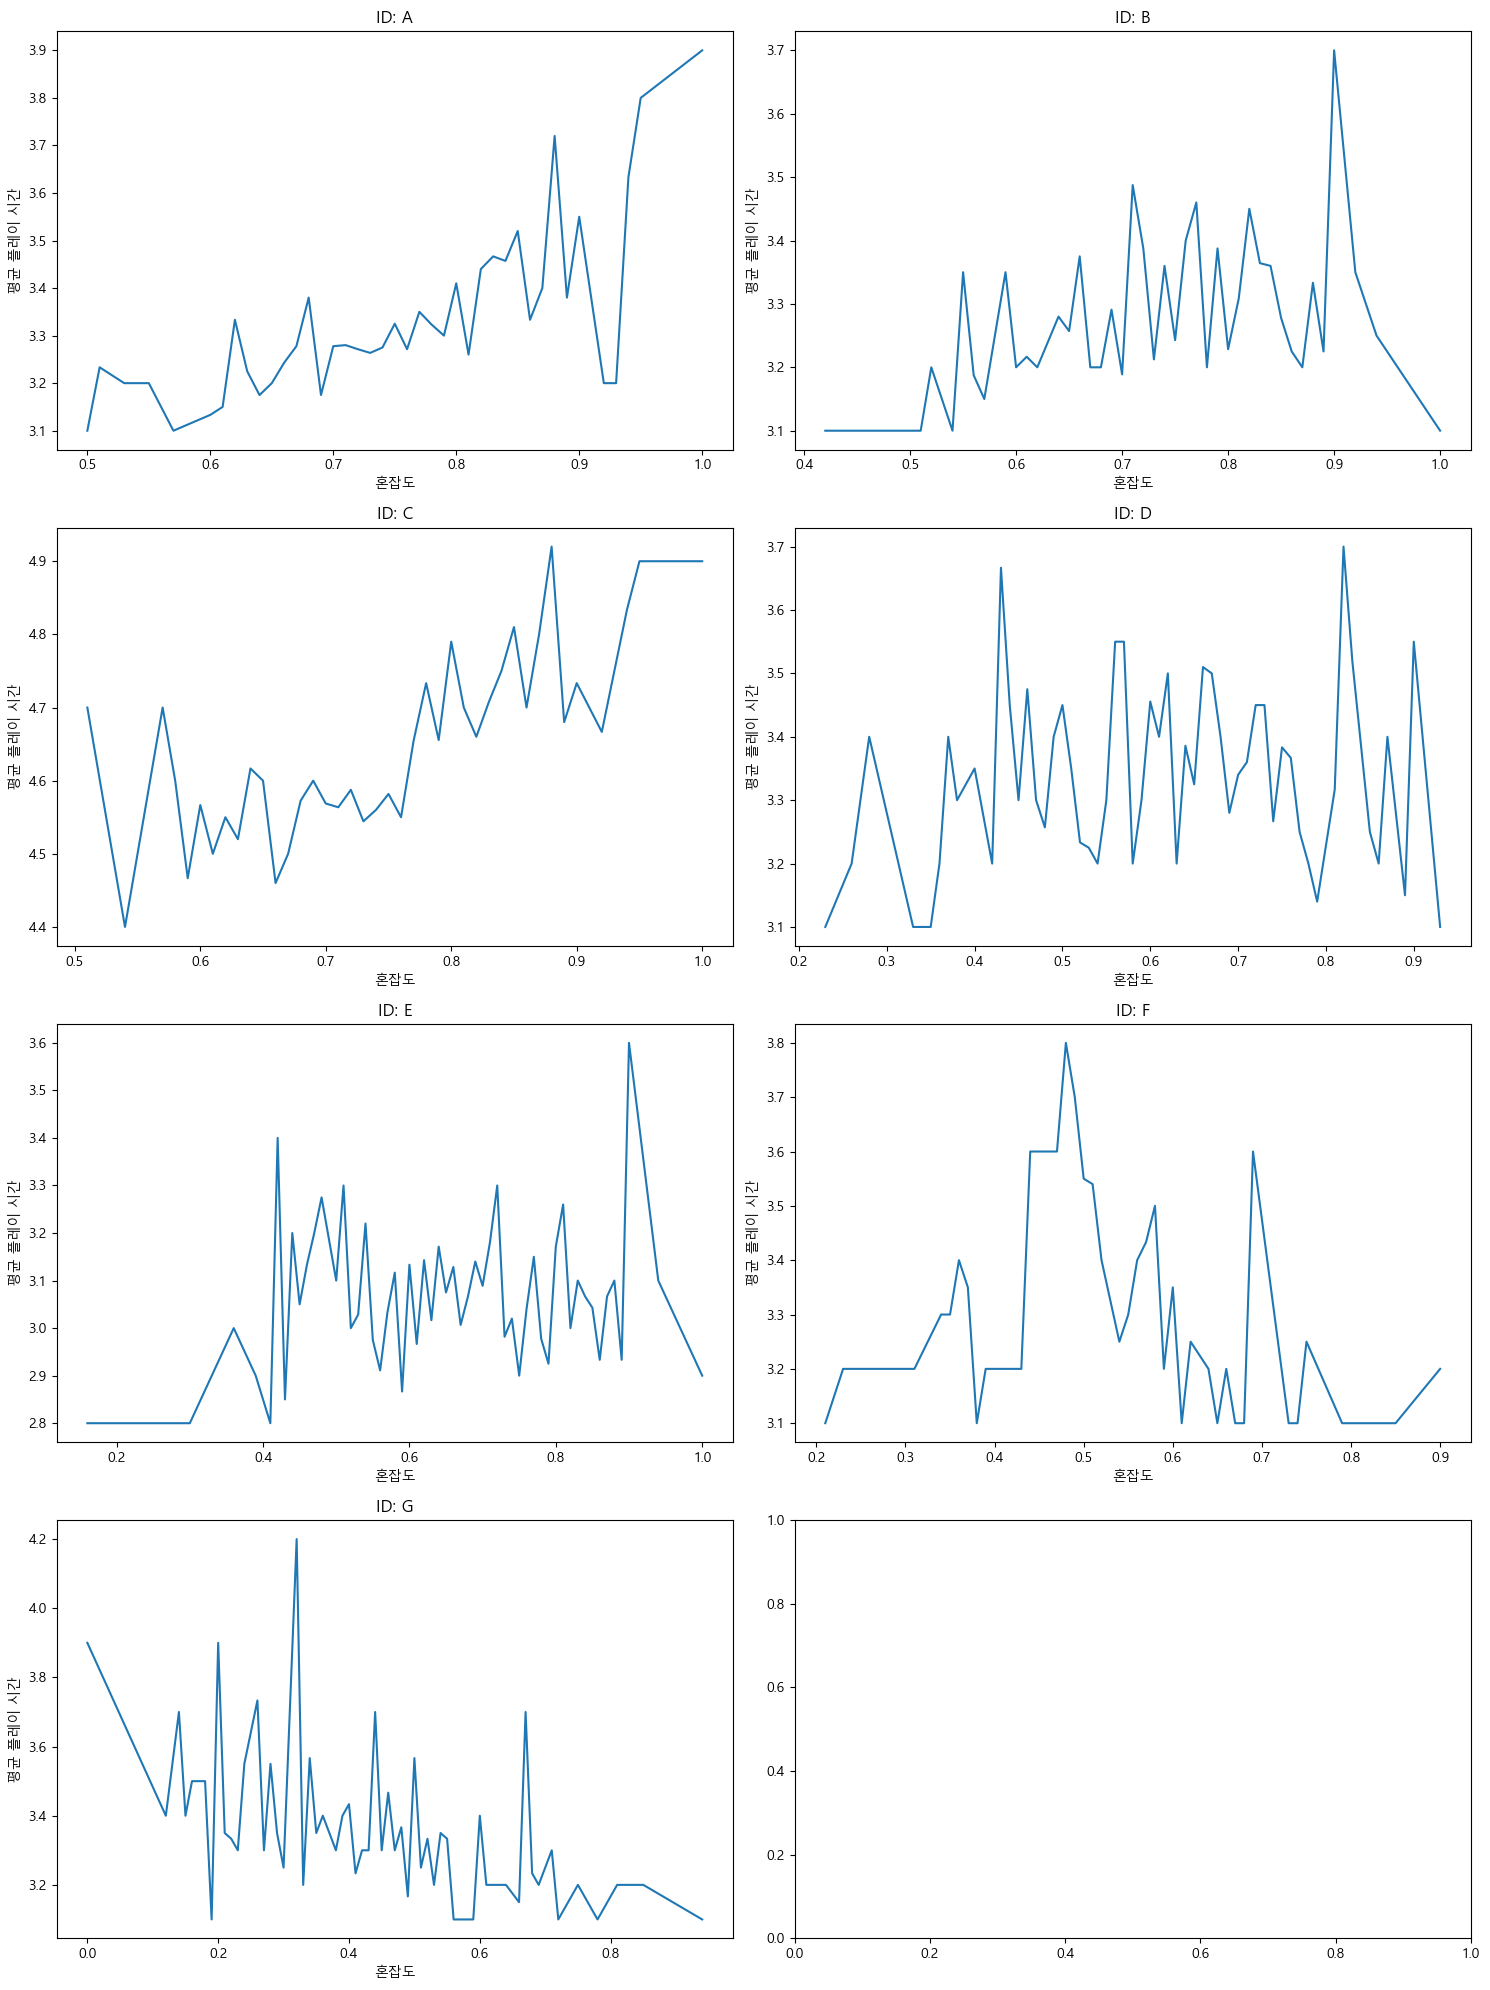

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
axes = axes.flatten()  

for ax, id in zip(axes, unique_ids):
    id_data = played[played['ID'] == id]
    
    crowdedness_playtime = id_data.groupby('Crowdedness')['PlayTimeHour'].mean().reset_index()
    sns.lineplot(data=crowdedness_playtime, x='Crowdedness', y='PlayTimeHour', ax=ax)
    
    ax.set_title(f'ID: {id}')
    ax.set_xlabel('혼잡도')
    ax.set_ylabel('평균 플레이 시간')

plt.tight_layout()
plt.show()

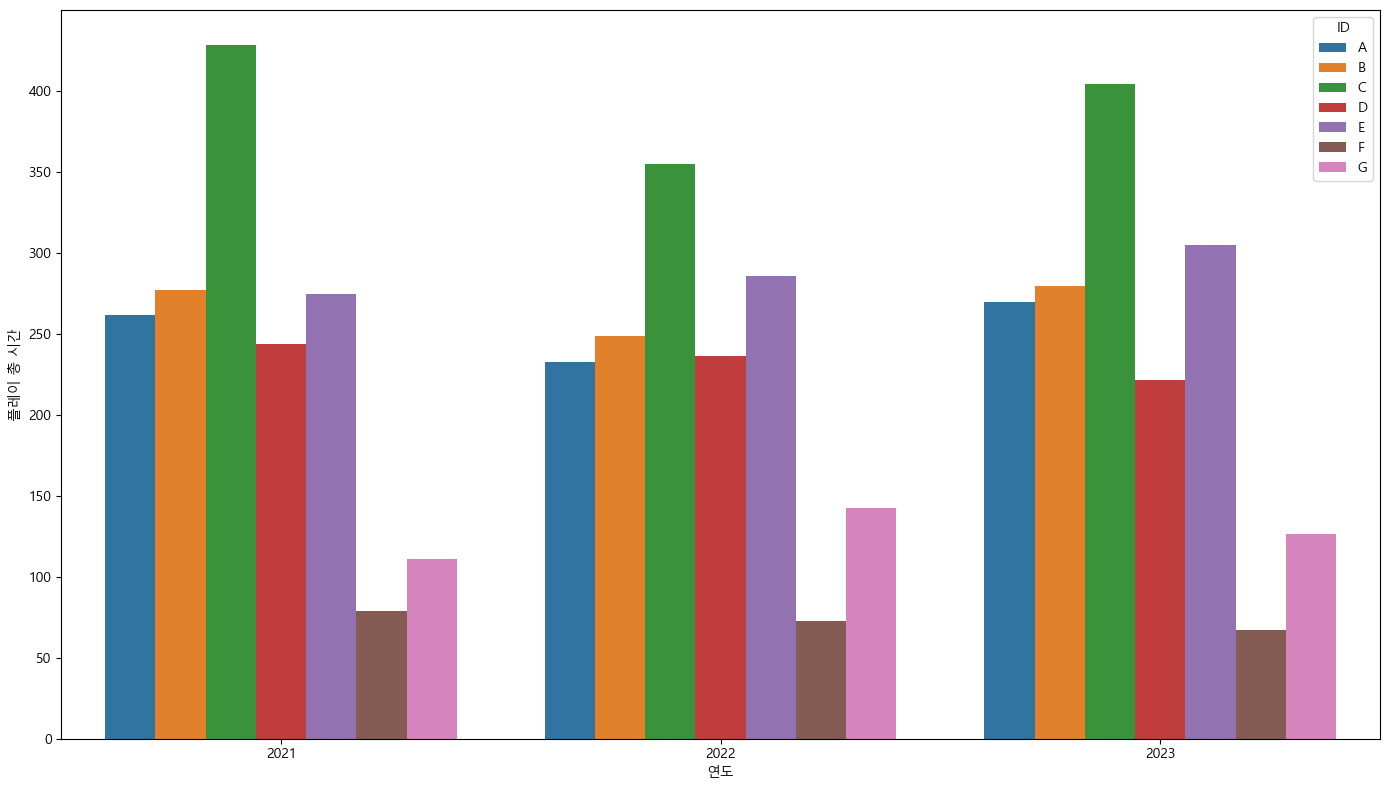

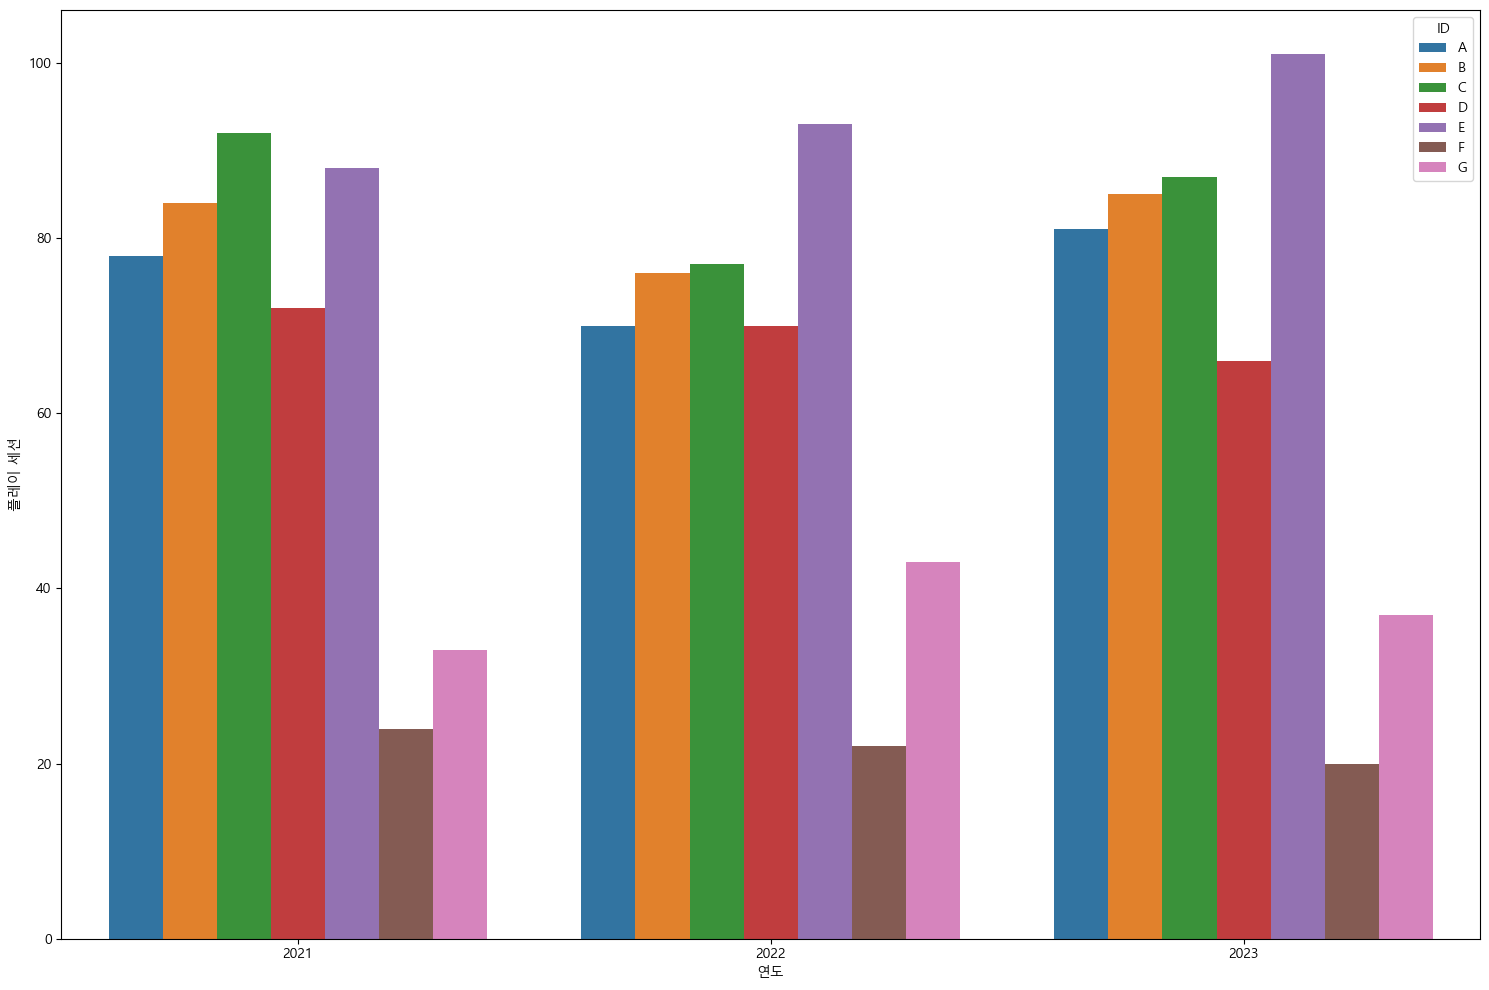

In [27]:
year_playtime = played.groupby(['Year', 'ID'])['PlayTimeHour'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=year_playtime, x='Year', y='PlayTimeHour', hue='ID')
plt.xlabel('연도')
plt.ylabel('플레이 총 시간')
plt.legend(title='ID', loc='upper right')
plt.tight_layout()
plt.show()

year_playtime = played.groupby(['Year', 'ID'])['Play'].sum().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(data=year_playtime, x='Year', y='Play', hue='ID')
plt.xlabel('연도')
plt.ylabel('플레이 세션')
plt.legend(title='ID', loc='upper right')
plt.tight_layout()
plt.show()

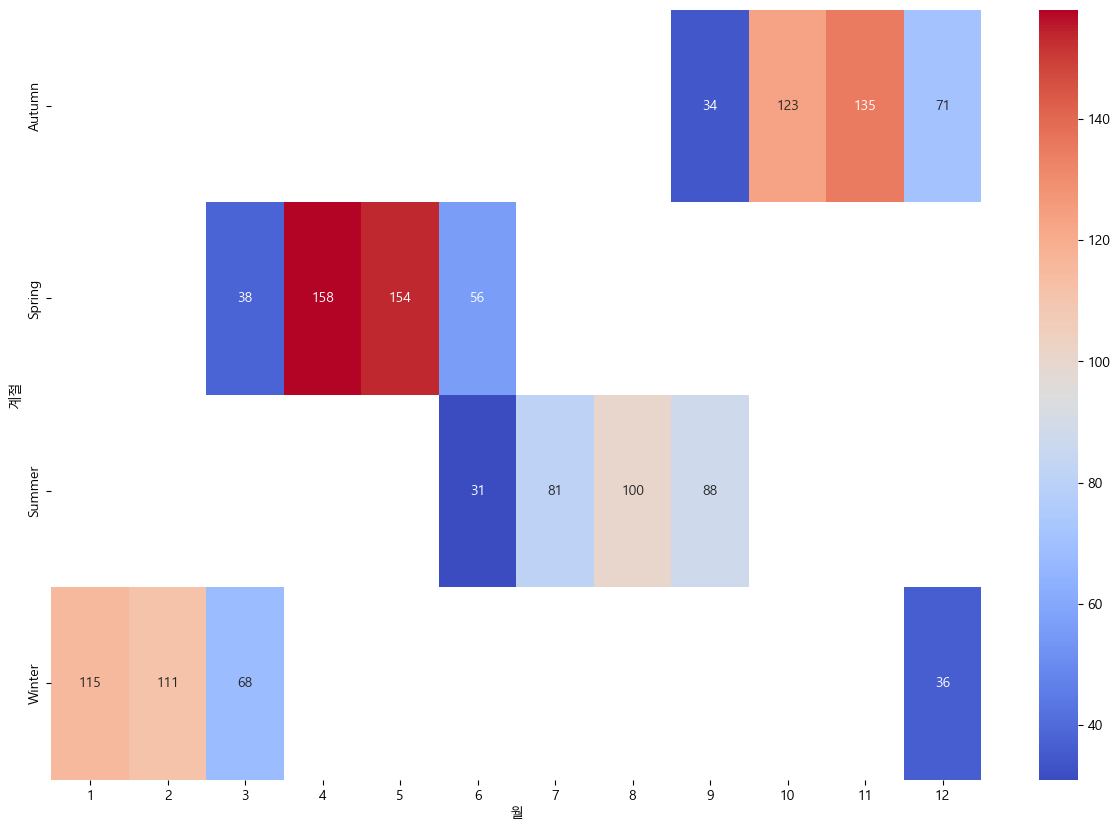

In [28]:
month_season_sessions = played.groupby(['Season', 'Month_Num'])['Play'].count().unstack()

plt.figure(figsize=(15, 10))
sns.heatmap(month_season_sessions, annot=True, fmt="g", cmap='coolwarm')
plt.xlabel('월')
plt.ylabel('계절')
plt.show()

C:\Users\JOOYONKJ\AppData\Local\Temp\ipykernel_19008\785206845.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_outlook_hour = outlook_hour_sessions.pivot('PlayTimeHour', 'Outlook', 'Play')


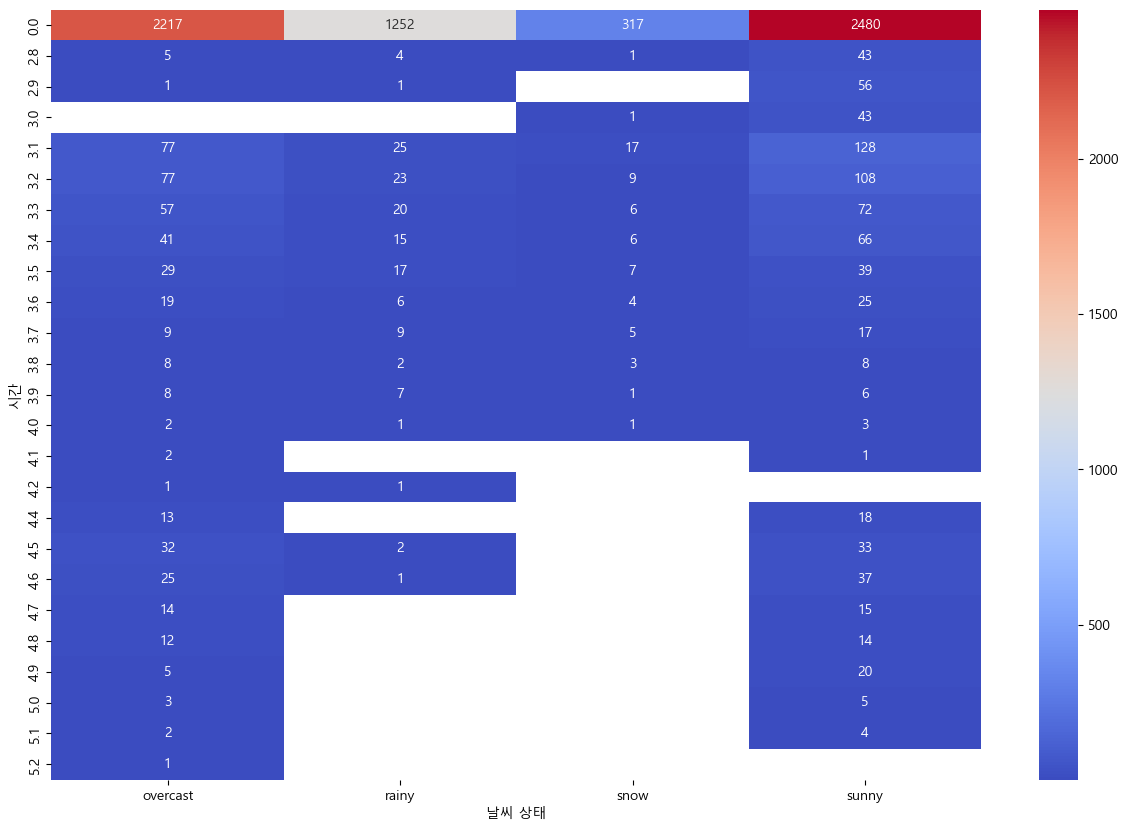

In [29]:
outlook_hour_sessions = golf_df.groupby(['Outlook', 'PlayTimeHour'])['Play'].count().reset_index()
pivot_outlook_hour = outlook_hour_sessions.pivot('PlayTimeHour', 'Outlook', 'Play')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_outlook_hour, annot=True, fmt="g", cmap='coolwarm')
plt.xlabel('날씨 상태')
plt.ylabel('시간')
plt.show()